<a href="https://colab.research.google.com/github/cmpm09/Challenge-Telecom-X-analisis-de-evasion-de-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - An√°lisis de Evasi√≥n de Clientes

Has sido contratado como asistente de an√°lisis de datos en Telecom X y formar√°s parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes.

Tu desaf√≠o ser√° recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer informaci√≥n valiosa. A partir de tu an√°lisis, el equipo de Data Science podr√° avanzar en modelos predictivos y desarrollar estrategias para reducir la evasi√≥n.

¬øQu√© vas a practicar?

- Importar y manipular datos desde una API de manera eficiente.
- Aplicar los conceptos de ETL (Extracci√≥n, Transformaci√≥n y Carga) en la preparaci√≥n de los datos.
- Crear visualizaciones estrat√©gicas para identificar patrones y tendencias.
- Realizar un An√°lisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¬°Ahora es tu turno! üöÄ Usa tus conocimientos para transformar datos en informaci√≥n estrat√©gica y ayudar a Telecom X a retener m√°s clientes.

#üìå Extracci√≥n

- Cargar los datos directamente desde la API utilizando Python.
- Convertir los datos a un DataFrame de Pandas para facilitar su manipulaci√≥n.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json'

datos = pd.read_json(url)
datos.head(2)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [3]:
datos.shape
# (filas, columnas)

(7267, 6)

#üîß Transformaci√≥n

##Conocer el conjunto de datos

Explorar las columnas del dataset y verificar sus tipos de datos.

In [4]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Consultar el diccionario para comprender mejor el significado de las variables.

###Diccionario de datos

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de streaming de pel√≠culas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en l√≠nea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

Identificar las columnas m√°s relevantes para el an√°lisis de evasi√≥n.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
datos.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

##Comprobaci√≥n de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el an√°lisis. Presta atenci√≥n a valores ausentes, duplicados, errores de formato e inconsistencias en las categor√≠as. Este proceso es esencial para asegurarte de que los datos est√©n listos para las siguientes etapas.

In [7]:
datos.customerID.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [8]:
datos.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [9]:
datos.head(2)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [10]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [11]:
import json

In [12]:
for i in columnas:
  columna = pd.json_normalize(datos[i])

  for n in columna:
    datos[n] = columna[n].values

datos.head(2)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  gender  SeniorCitizen  \
0  {'Contract': 'One year', 'PaperlessBilling': '...  Female              0   
1  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              0   

  Partner Dependents  ...  OnlineBackup DeviceProtection TechSupport  \
0     Yes        Yes  ...           Yes               No         Yes   
1      No         No  ...            No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling PaymentMethod  \
0         Yes              No        One year              Yes  Mailed check   
1          No             Yes  Month-to-month               No  Mailed check   

  Charges.Monthly Charges.Total  
0            65.6         593.3  
1            59.9         542.4  

[2 rows x 25 columns]

In [13]:
columnas = list(datos.columns)
columnas

['customerID',
 'Churn',
 'customer',
 'phone',
 'internet',
 'account',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [14]:
datos = datos.drop(columns=['customer', 'phone','internet', 'account'])
datos.head(10)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   
5  0013-MHZWF    No  Female              0      No        Yes       9   
6  0013-SMEOE    No  Female              1     Yes         No      71   
7  0014-BMAQU    No    Male              0     Yes         No      63   
8  0015-UOCOJ    No  Female              1      No         No       7   
9  0016-QLJIS    No  Female              0     Yes        Yes      65   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   
5          Yes            No             DSL  ...           No   
6          Yes            No     Fiber optic  ...          Yes   
7          Yes           Yes     Fiber optic  ...           No   
8          Yes            No             DSL  ...           No   
9          Yes           Yes             DSL  ...          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   
5               No         Yes         Yes             Yes  Month-to-month   
6              Yes         Yes         Yes             Yes        Two year   
7               No         Yes          No              No        Two year   
8               No          No          No              No  Month-to-month   
9              Yes         Yes         Yes             Yes        Two year   

  PaperlessBilling              PaymentMethod Charges.Monthly  Charges.Total  
0              Yes               Mailed check           65.60          593.3  
1               No               Mailed check           59.90          542.4  
2              Yes           Electronic check           73.90         280.85  
3              Yes           Electronic check           98.00        1237.85  
4              Yes               Mailed check           83.90          267.4  
5              Yes    Credit card (automatic)           69.40         571.45  
6              Yes  Bank transfer (automatic)          109.70        7904.25  
7              Yes    Credit card (automatic)           84.65         5377.8  
8              Yes           Electronic check           48.20         340.35  
9              Yes               Mailed check           90.45         5957.9  

[10 rows x 21 columns]

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de streaming de pel√≠culas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en l√≠nea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

##Manejo de inconsistencias

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
datos.columns = datos.columns.str.replace('.', '_')
datos.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges_Monthly  Charges_Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [17]:
datos['Charges_Total'] = datos['Charges_Total'].replace(' ', np.nan)
datos['Charges_Total'] = pd.to_numeric(datos['Charges_Total'], errors='coerce')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Columna de cuentas diarias

Ahora que los datos est√°n limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturaci√≥n mensual para calcular el valor diario, proporcionando una visi√≥n m√°s detallada del comportamiento de los clientes a lo largo del tiempo.

üìå Esta columna te ayudar√° a profundizar en el an√°lisis y a obtener informaci√≥n valiosa para las siguientes etapas.

In [18]:
datos['Cuentas_Diarias'] = datos['Charges_Monthly'].apply(lambda x: x/30.4167)
datos.head(2)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   

  PaymentMethod Charges_Monthly Charges_Total  Cuentas_Diarias  
0  Mailed check            65.6         593.3         2.156710  
1  Mailed check            59.9         542.4         1.969313  

[2 rows x 22 columns]

##Estandarizaci√≥n y transformaci√≥n de datos (opcional)

La estandarizaci√≥n y transformaci√≥n de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la informaci√≥n sea m√°s consistente, comprensible y adecuada para el an√°lisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "S√≠" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matem√°tico y la aplicaci√≥n de modelos anal√≠ticos.

Adem√°s, traducir o renombrar columnas y datos hace que la informaci√≥n sea m√°s accesible y f√°cil de entender, especialmente cuando se trabaja con fuentes externas o t√©rminos t√©cnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicaci√≥n de los resultados, facilitando la interpretaci√≥n y evitando confusiones, especialmente al compartir informaci√≥n con stakeholders no t√©cnicos.

In [19]:
columnas = list(datos.columns)

In [20]:
nombres_nuevos=['clientesID', 'estadia_empresa', 'genero', 'adulto_mayor', 'pareja', 'dependientes', 'meses_contrato', 'servicio_telefono', 'lineas_multiples', 'proveedor_internet', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico', 'suscripcion_tv', 'suscripcion_peliculas', 'contrato', 'facturacion_electronica', 'forma_pago', 'gastos_mensuales', 'gastos_totales', 'cuentas_diarias']

In [21]:
renombrar = dict(zip(columnas, nombres_nuevos))

datos = datos.rename(columns=renombrar)

datos.head(2)

clientesID estadia_empresa  genero  adulto_mayor pareja dependientes  \
0  0002-ORFBO              No  Female             0    Yes          Yes   
1  0003-MKNFE              No    Male             0     No           No   

   meses_contrato servicio_telefono lineas_multiples proveedor_internet  ...  \
0               9               Yes               No                DSL  ...   
1               9               Yes              Yes                DSL  ...   

  proteccion_adicional soporte_tecnico suscripcion_tv suscripcion_peliculas  \
0                   No             Yes            Yes                    No   
1                   No              No             No                   Yes   

         contrato facturacion_electronica    forma_pago gastos_mensuales  \
0        One year                     Yes  Mailed check             65.6   
1  Month-to-month                      No  Mailed check             59.9   

  gastos_totales  cuentas_diarias  
0          593.3         2.156710  
1          542.4         1.969313  

[2 rows x 22 columns]

In [22]:
columnas_yes_no = ['estadia_empresa','pareja', 'dependientes', 'servicio_telefono', 'lineas_multiples', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico', 'suscripcion_tv', 'suscripcion_peliculas', 'facturacion_electronica']

In [23]:
for i in columnas_yes_no:
    datos[i] = datos[i].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
datos['genero']=datos['genero'].replace({'Female': 'Mujer', 'Male': 'Hombre'})

In [25]:
datos.tail()

clientesID  estadia_empresa  genero  adulto_mayor  pareja  dependientes  \
7262  9987-LUTYD                0   Mujer             0       0             0   
7263  9992-RRAMN                1  Hombre             0       1             0   
7264  9992-UJOEL                0  Hombre             0       0             0   
7265  9993-LHIEB                0  Hombre             0       1             1   
7266  9995-HOTOH                0  Hombre             0       1             1   

      meses_contrato  servicio_telefono  lineas_multiples proveedor_internet  \
7262              13                  1                 0                DSL   
7263              22                  1                 1        Fiber optic   
7264               2                  1                 0                DSL   
7265              67                  1                 0                DSL   
7266              63                  0                 0                DSL   

      ...  proteccion_adicional  soporte_tecnico  suscripcion_tv  \
7262  ...                     0                1               0   
7263  ...                     0                0               0   
7264  ...                     0                0               0   
7265  ...                     1                1               0   
7266  ...                     1                0               1   

      suscripcion_peliculas        contrato  facturacion_electronica  \
7262                      0        One year                        0   
7263                      1  Month-to-month                        1   
7264                      0  Month-to-month                        1   
7265                      1        Two year                        0   
7266                      1        Two year                        0   

            forma_pago  gastos_mensuales gastos_totales  cuentas_diarias  
7262      Mailed check             55.15         742.90         1.813149  
7263  Electronic check             85.10        1873.70         2.797805  
7264      Mailed check             50.30          92.75         1.653697  
7265      Mailed check             67.85        4627.65         2.230682  
7266  Electronic check             59.00        3707.60         1.939724  

[5 rows x 22 columns]

#üìä Carga y an√°lisis

##An√°lisis Descriptivo

Para comenzar, realiza un an√°lisis descriptivo de los datos, calculando m√©tricas como media, mediana, desviaci√≥n est√°ndar y otras medidas que ayuden a comprender mejor la distribuci√≥n y el comportamiento de los clientes.

In [26]:
datos.describe()

estadia_empresa  adulto_mayor       pareja  dependientes  \
count      7267.000000   7267.000000  7267.000000   7267.000000   
mean          0.257190      0.162653     0.484106      0.300124   
std           0.437115      0.369074     0.499782      0.458343   
min           0.000000      0.000000     0.000000      0.000000   
25%           0.000000      0.000000     0.000000      0.000000   
50%           0.000000      0.000000     0.000000      0.000000   
75%           1.000000      0.000000     1.000000      1.000000   
max           1.000000      1.000000     1.000000      1.000000   

       meses_contrato  servicio_telefono  lineas_multiples  seguridad_linea  \
count     7267.000000        7267.000000       7267.000000      7267.000000   
mean        32.346498           0.902711          0.421770         0.285950   
std         24.571773           0.296371          0.493876         0.451897   
min          0.000000           0.000000          0.000000         0.000000   
25%          9.000000           1.000000          0.000000         0.000000   
50%         29.000000           1.000000          0.000000         0.000000   
75%         55.000000           1.000000          1.000000         1.000000   
max         72.000000           1.000000          1.000000         1.000000   

       respaldo_linea  proteccion_adicional  soporte_tecnico  suscripcion_tv  \
count     7267.000000           7267.000000      7267.000000     7267.000000   
mean         0.344571              0.342782         0.289528        0.383927   
std          0.475261              0.474672         0.453575        0.486374   
min          0.000000              0.000000         0.000000        0.000000   
25%          0.000000              0.000000         0.000000        0.000000   
50%          0.000000              0.000000         0.000000        0.000000   
75%          1.000000              1.000000         1.000000        1.000000   
max          1.000000              1.000000         1.000000        1.000000   

       suscripcion_peliculas  facturacion_electronica  gastos_mensuales  \
count            7267.000000              7267.000000       7267.000000   
mean                0.387505                 0.593230         64.720098   
std                 0.487214                 0.491265         30.129572   
min                 0.000000                 0.000000         18.250000   
25%                 0.000000                 0.000000         35.425000   
50%                 0.000000                 1.000000         70.300000   
75%                 1.000000                 1.000000         89.875000   
max                 1.000000                 1.000000        118.750000   

       gastos_totales  cuentas_diarias  
count     7256.000000      7267.000000  
mean      2280.634213         2.127782  
std       2268.632997         0.990560  
min         18.800000         0.599999  
25%        400.225000         1.164656  
50%       1391.000000         2.311230  
75%       3785.300000         2.954791  
max       8684.800000         3.904105

In [27]:
columnas_yes_no

['estadia_empresa',
 'pareja',
 'dependientes',
 'servicio_telefono',
 'lineas_multiples',
 'seguridad_linea',
 'respaldo_linea',
 'proteccion_adicional',
 'soporte_tecnico',
 'suscripcion_tv',
 'suscripcion_peliculas',
 'facturacion_electronica']

In [28]:
suma = {}
for i in columnas_yes_no:
    suma[i] = int(datos[i].sum())
suma

{'estadia_empresa': 1869,
 'pareja': 3518,
 'dependientes': 2181,
 'servicio_telefono': 6560,
 'lineas_multiples': 3065,
 'seguridad_linea': 2078,
 'respaldo_linea': 2504,
 'proteccion_adicional': 2491,
 'soporte_tecnico': 2104,
 'suscripcion_tv': 2790,
 'suscripcion_peliculas': 2816,
 'facturacion_electronica': 4311}

##Distribuci√≥n de evasi√≥n

En este paso, el objetivo es comprender c√≥mo est√° distribuida la variable "churn" (estadia_empresa) entre los clientes. Utiliza gr√°ficos para visualizar la proporci√≥n de clientes que permanecieron y los que se dieron de baja.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

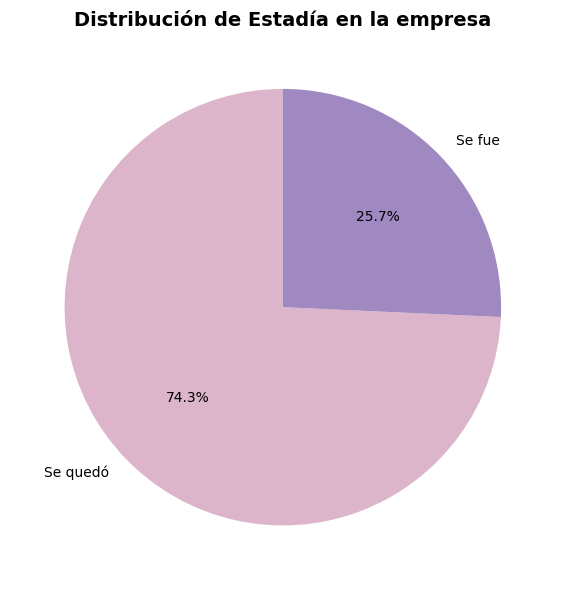

In [30]:
churn_counts = datos['estadia_empresa'].value_counts() # Correct assignment of the Series

labels = ['Se qued√≥', 'Se fue']

colors = ['#DCB5CA', '#A088C1']  # amarillo pastel y naranja suave

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuci√≥n de Estad√≠a en la empresa', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.savefig('/content/porcentaje_estadia.png', transparent=False, dpi=300, bbox_inches='tight') # Use plt.savefig to save the current figure
plt.show()

<ipython-input-31-c9277389d8d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='estadia_empresa', data=datos, palette='icefire')


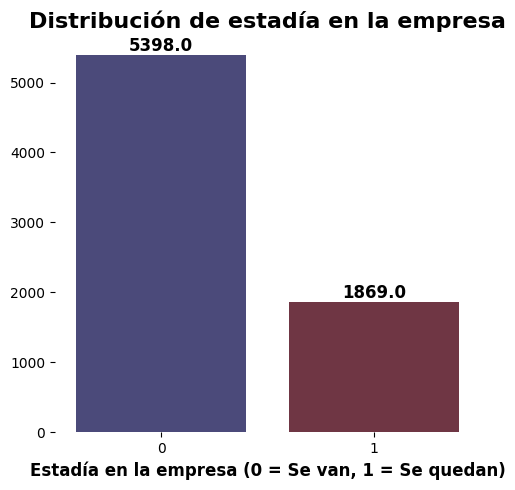

In [31]:
fig2, ax = plt.subplots(figsize=(5, 5))

ax = sns.countplot(x='estadia_empresa', data=datos, palette='icefire')

ax.set_title('Distribuci√≥n de estad√≠a en la empresa', fontsize=16, fontweight='bold')
ax.set_xlabel('Estad√≠a en la empresa (0 = Se van, 1 = Se quedan)', fontsize=12, fontweight='bold')
ax.set_ylabel('')
ax.set_frame_on(False)
sns.despine()

total = len(datos)

for p in ax.patches:
    cantidad = p.get_height()
    total = f'{(cantidad)}'
    ax.annotate(total,
                (p.get_x() + p.get_width() / 2, cantidad),
                ha='center', va='bottom', fontsize=12, fontweight='bold', fontfamily = 'sans-serif')

plt.tight_layout()

fig2.savefig('/content/estadia.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

##Recuento de evasi√≥n por variables categ√≥ricas

Ahora, exploraremos c√≥mo se distribuye la evasi√≥n seg√∫n variables categ√≥ricas, como g√©nero, tipo de contrato, m√©todo de pago, entre otras.

Este an√°lisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudar√° a orientar acciones estrat√©gicas.

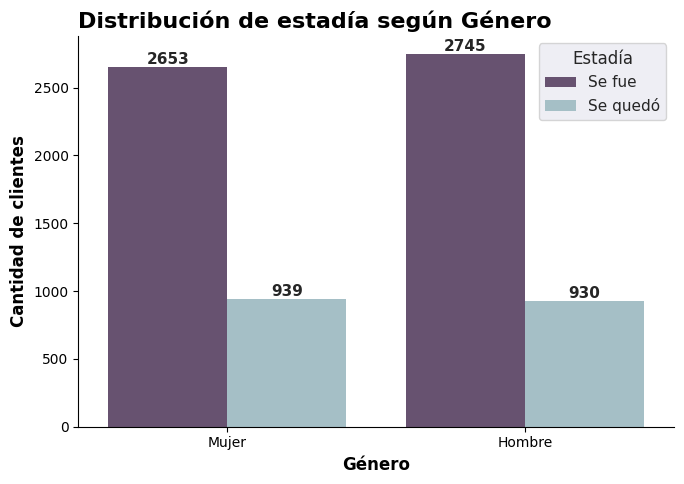

In [32]:
# G√âNERO
plt.figure(figsize=(7,5))

ax = sns.countplot(x='genero', hue='estadia_empresa', data=datos, palette=['#694D75', '#9FC2CC'])

ax.set_title('Distribuci√≥n de estad√≠a seg√∫n G√©nero', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('G√©nero', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se qued√≥'], title='Estad√≠a')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/estadia_genero.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


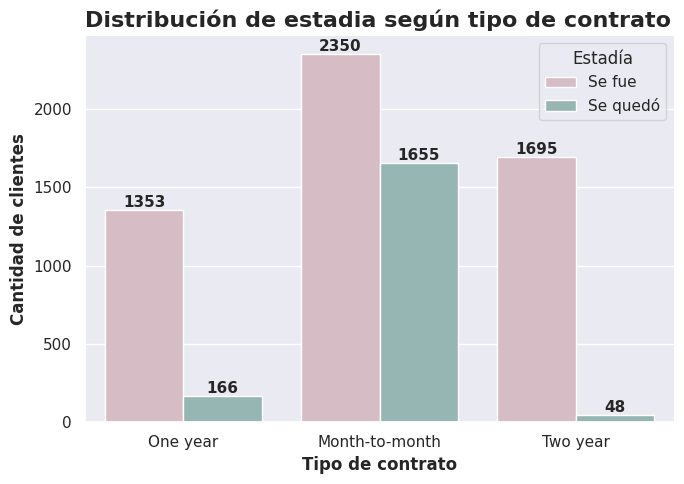

In [33]:
# TIPO DE CONTRATO
plt.figure(figsize=(7,5))

ax = sns.countplot(x='contrato', hue='estadia_empresa', data=datos, palette=['#D9B8C4', '#91BBB8'])

ax.set_title('Distribuci√≥n de estadia seg√∫n tipo de contrato', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Tipo de contrato', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se qued√≥'], title='Estad√≠a')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/estadia_contrato.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

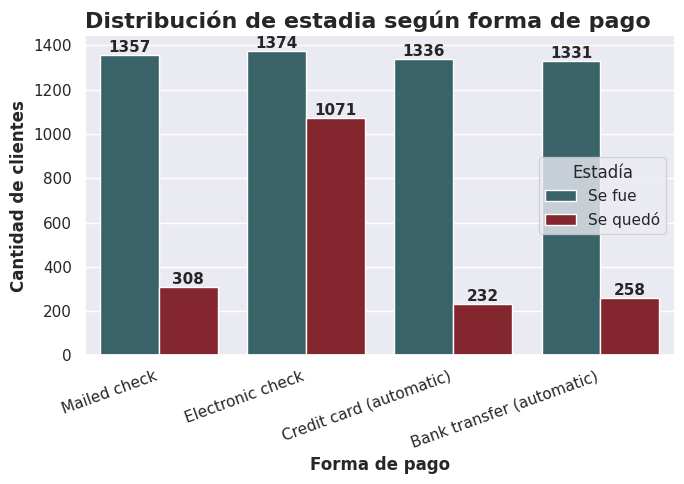

In [34]:
# M√âTODO DE PAGO
plt.figure(figsize=(7,5))

ax = sns.countplot(x='forma_pago', hue='estadia_empresa', data=datos, palette=['#326771', '#931621'])

ax.set_title('Distribuci√≥n de estadia seg√∫n forma de pago', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Forma de pago', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se qued√≥'], title='Estad√≠a', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.xticks(rotation=20, ha='right')

plt.tight_layout()

plt.savefig('/content/estadia_formaPago.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [35]:
datos['proveedor_internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

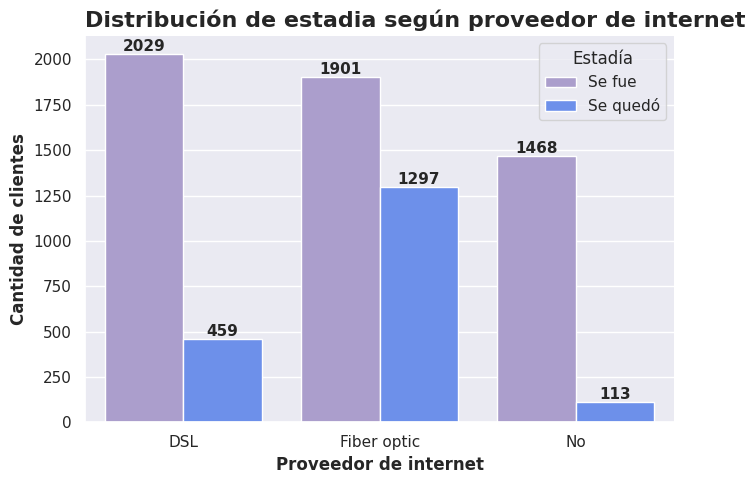

In [36]:
# proveedor_internet
plt.figure(figsize=(7,5))

ax = sns.countplot(x='proveedor_internet', hue='estadia_empresa', data=datos, palette=['#A896D4', '#5887FF'])

ax.set_title('Distribuci√≥n de estadia seg√∫n proveedor de internet', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Proveedor de internet', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se qued√≥'], title='Estad√≠a', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('/content/estadia_proveedorIntenet.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

##Conteo de evasi√≥n por variables num√©ricas

En este paso, explora c√≥mo las variables num√©ricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasi√≥n) y los que no cancelaron.

Este an√°lisis ayuda a entender si ciertos valores num√©ricos est√°n m√°s asociados con la evasi√≥n, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

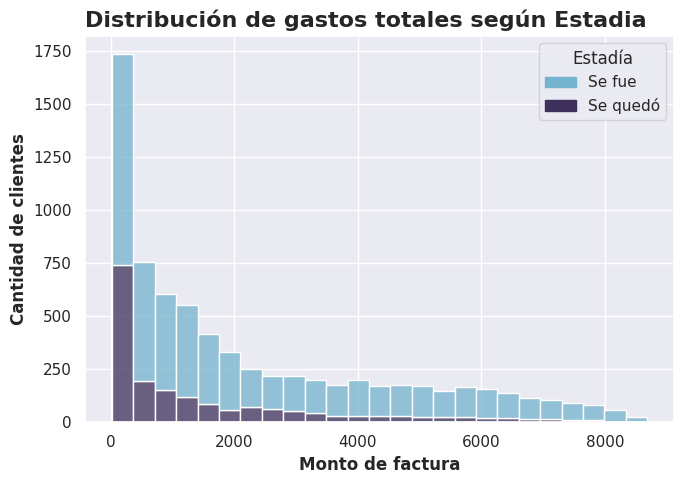

In [37]:
#GASTOS TOTALES
import matplotlib.patches as mpatches

plt.figure(figsize=(7,5))
ax = sns.histplot(data=datos, x='gastos_totales', hue='estadia_empresa', multiple='stack', palette=['#74B3CE', '#3D315B'])

ax.set_title('Distribuci√≥n de gastos totales seg√∫n Estadia', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Monto de factura', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')

patch_se_fue = mpatches.Patch(color='#74B3CE', label='Se fue')
patch_se_quedo = mpatches.Patch(color='#3D315B', label='Se qued√≥')
ax.legend(handles=[patch_se_fue, patch_se_quedo], title='Estad√≠a', loc='best')

plt.tight_layout()

plt.savefig('/content/estadia_gastosTotales.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()



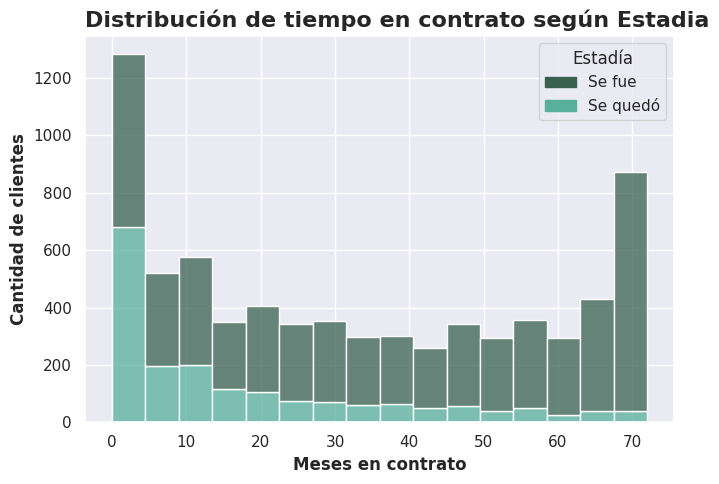

In [38]:
#TIEMPO DE CONTRATO
import matplotlib.patches as mpatches

plt.figure(figsize=(7,5))
ax = sns.histplot(data=datos, x='meses_contrato', hue='estadia_empresa', multiple='stack', palette=['#386150', '#58B09C'])

ax.set_title('Distribuci√≥n de tiempo en contrato seg√∫n Estadia', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Meses en contrato', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')

patch_se_fue = mpatches.Patch(color='#386150', label='Se fue')
patch_se_quedo = mpatches.Patch(color='#58B09C', label='Se qued√≥')
ax.legend(handles=[patch_se_fue, patch_se_quedo], title='Estad√≠a', loc='best')

plt.tight_layout()
plt.savefig('/content/estadia_tiempoContrato.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


In [39]:
columna_dependientes = datos[['dependientes', 'estadia_empresa']]
columna_dependientes['dependientes'] = columna_dependientes['dependientes'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


<ipython-input-39-3fdc7ecc296e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columna_dependientes['dependientes'] = columna_dependientes['dependientes'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


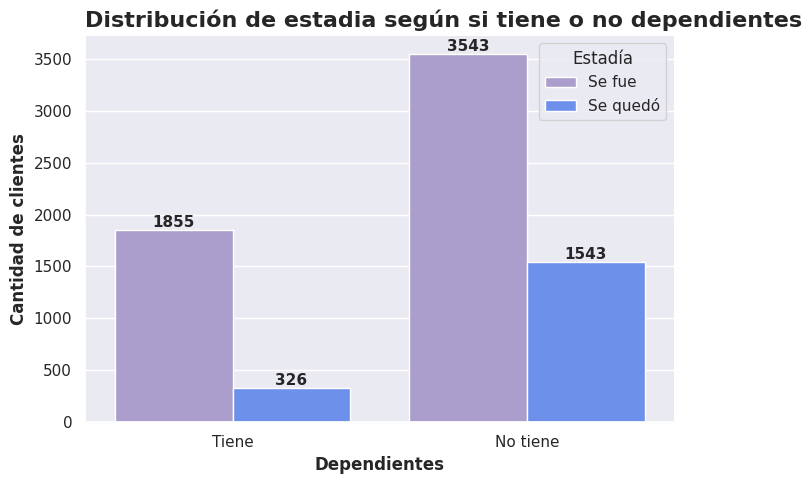

In [40]:
# DEPENDIENTES
plt.figure(figsize=(7,5))

ax = sns.countplot(x='dependientes', hue='estadia_empresa', data=columna_dependientes, palette=['#A896D4', '#5887FF'])

ax.set_title('Distribuci√≥n de estadia seg√∫n si tiene o no dependientes', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Dependientes', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se qued√≥'], title='Estad√≠a', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('/content/estadia_dependientes.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [41]:
columna_multiples = datos[['lineas_multiples', 'estadia_empresa']]
columna_multiples['lineas_multiples'] = columna_multiples['lineas_multiples'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


<ipython-input-41-cf647892f87e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columna_multiples['lineas_multiples'] = columna_multiples['lineas_multiples'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


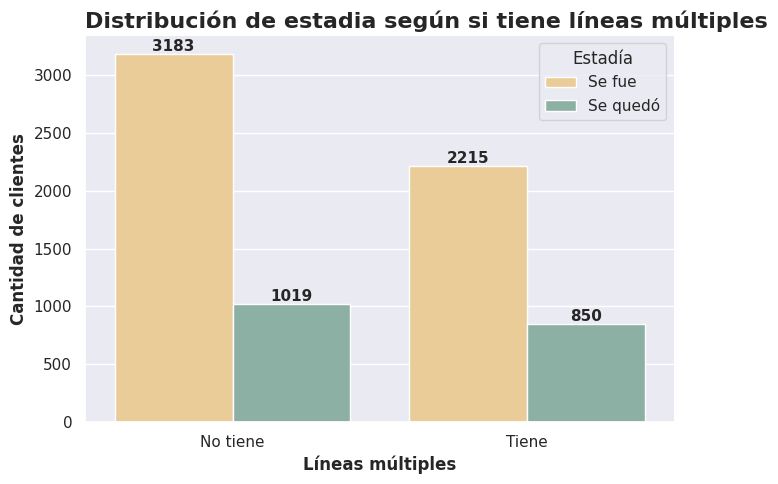

In [42]:
# L√çNEAS MULTIPLES
plt.figure(figsize=(7,5))

ax = sns.countplot(x='lineas_multiples', hue='estadia_empresa', data=columna_multiples, palette=['#F7D08A', '#87B6A7'])

ax.set_title('Distribuci√≥n de estadia seg√∫n si tiene l√≠neas m√∫ltiples', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('L√≠neas m√∫ltiples', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se qued√≥'], title='Estad√≠a', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('/content/estadia_lineasMultiples.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [43]:
columnas_adicionales = datos[['estadia_empresa', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico']].copy()

for col in ['seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico']:
    columnas_adicionales[col] = columnas_adicionales[col].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')

servicios_melted = pd.melt(columnas_adicionales,
                           id_vars='estadia_empresa',
                           var_name='servicio',
                           value_name='estado')

servicios_melted['estadia_empresa'] = servicios_melted['estadia_empresa'].map({0: 'Se fue', 1: 'Se qued√≥'})



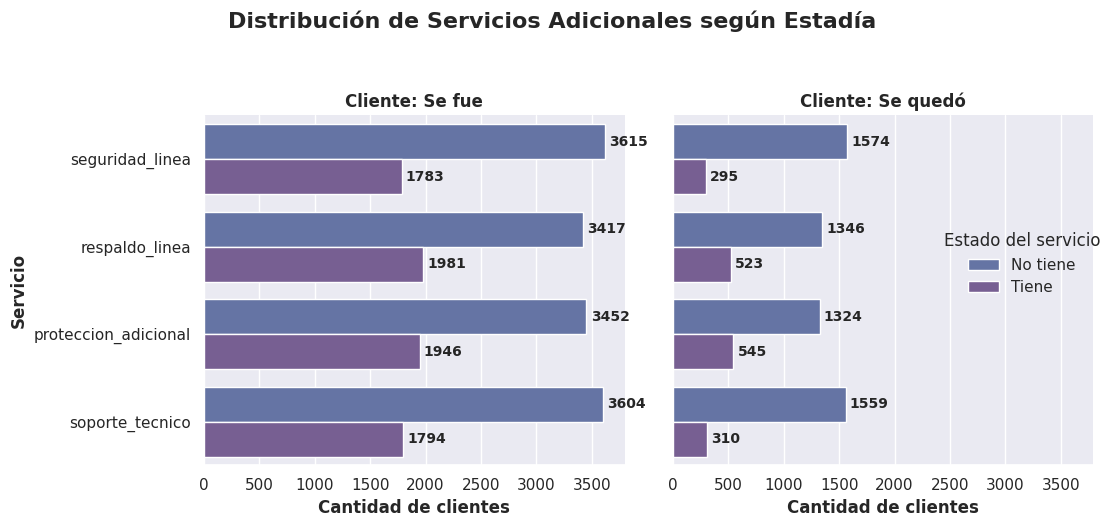

In [44]:
ax = sns.catplot(
    data=servicios_melted,
    kind='count',
    y='servicio', hue='estado',
    col='estadia_empresa',
    palette=['#5A6FAF', '#76569B'],
    height=5, aspect=1
)

ax.set_titles('Cliente: {col_name}', fontweight='bold')
ax.set_axis_labels('Cantidad de clientes', 'Servicio', fontweight='bold')
ax._legend.set_title('Estado del servicio')

plt.suptitle('Distribuci√≥n de Servicios Adicionales seg√∫n Estad√≠a',
             fontsize=16, fontweight='bold', y=1.05)

for a in ax.axes.flat:  # Recorre cada gr√°fico (columna)
    for container in a.containers:  # Cada grupo de barras (por hue)
        a.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/estadia_servicios_adicionales.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


## ¬°Extra! An√°lisis de correlaci√≥n entre variables

Como un paso adicional, puedes explorar la correlaci√≥n entre diferentes variables del dataset. Esto puede ayudar a identificar qu√© factores tienen mayor relaci√≥n con la evasi√≥n de clientes, como:

- La relaci√≥n entre la cuenta diaria y la evasi√≥n.
- C√≥mo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la funci√≥n corr() de Pandas para calcular las correlaciones y visualizar los resultados con gr√°ficos de dispersi√≥n o matrices de correlaci√≥n.

Este an√°lisis adicional puede proporcionar insights valiosos para la creaci√≥n de modelos predictivos m√°s robustos. üöÄ

###La relaci√≥n entre la cuenta diaria y la evasi√≥n.

In [56]:
columnas = datos.columns
columnas

Index(['clientesID', 'estadia_empresa', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefono',
       'lineas_multiples', 'proveedor_internet', 'seguridad_linea',
       'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico',
       'suscripcion_tv', 'suscripcion_peliculas', 'contrato',
       'facturacion_electronica', 'forma_pago', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias'],
      dtype='object')

In [57]:
columnas = datos.columns
correlacion = datos[['estadia_empresa', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefono',
       'lineas_multiples', 'seguridad_linea',
       'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico',
       'suscripcion_tv', 'suscripcion_peliculas',
       'facturacion_electronica', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias']].corr()

In [58]:
columns_to_drop = ['adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefono',
       'lineas_multiples', 'seguridad_linea',
       'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico',
       'suscripcion_tv', 'suscripcion_peliculas',
       'facturacion_electronica', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias']

correlacion = correlacion.drop(columns=columns_to_drop, axis = 0)
correlacion

estadia_empresa
estadia_empresa                 1.000000
adulto_mayor                    0.146733
pareja                         -0.148546
dependientes                   -0.161384
meses_contrato                 -0.344079
servicio_telefono               0.012571
lineas_multiples                0.039343
seguridad_linea                -0.166828
respaldo_linea                 -0.080163
proteccion_adicional           -0.063452
soporte_tecnico                -0.160440
suscripcion_tv                  0.062430
suscripcion_peliculas           0.060586
facturacion_electronica         0.186666
gastos_mensuales                0.189866
gastos_totales                 -0.194440
cuentas_diarias                 0.189866

C√≥mo la cantidad de servicios contratados afecta la probabilidad de churn.

In [48]:
servicios = datos[['servicio_telefono', 'lineas_multiples', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico', 'suscripcion_tv', 'suscripcion_peliculas', 'estadia_empresa']]

In [49]:
servicios['total_servicios'] = servicios.drop(columns='estadia_empresa').sum(axis=1)


<ipython-input-49-d727197ae38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  servicios['total_servicios'] = servicios.drop(columns='estadia_empresa').sum(axis=1)


In [60]:
correlacion_servicios = servicios[['total_servicios', 'estadia_empresa']].corr()
print(correlacion_servicios)


                 total_servicios  estadia_empresa
total_servicios         1.000000        -0.064642
estadia_empresa        -0.064642         1.000000


Cercano a 1: m√°s servicios ‚Üí m√°s probabilidad de quedarse.

Cercano a -1: m√°s servicios ‚Üí m√°s probabilidad de irse.

Cercano a 0: no hay relaci√≥n lineal clara.

#üìÑInforme final

Finaliza el desaf√≠o elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

üîπ Introducci√≥n: Explica el objetivo del an√°lisis y el problema de evasi√≥n de clientes (Churn).

üîπ Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

üîπ An√°lisis Exploratorio de Datos: Presenta los an√°lisis realizados, incluyendo gr√°ficos y visualizaciones para identificar patrones.

üîπ Conclusiones e Insights: Resume los principales hallazgos y c√≥mo estos datos pueden ayudar a reducir la evasi√≥n.

üîπ Recomendaciones: Ofrece sugerencias estrat√©gicas basadas en tu an√°lisis.

Aseg√∫rate de que el informe est√© bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. üöÄ

## **Introducci√≥n**

La evasi√≥n de clientes es un tema serio, son los que le dan vida a la compa√±√≠a, por lo que es de vital importancia conocer las razones principales por las que han decidido abandonar la empresa, o en caso de no saberlas, observar en las bases de datos que factores los hacen quedarse y cu√°les irse.

El objetivo de esta manipulaci√≥n y transformaci√≥n de datos es extraer informaci√≥n valiosa que sirva para analizar las razones principales por las que los clientes han decidido dejar la empresa, todo esto con el fin de que el an√°lisis sirve de gu√≠a para que el equipo de DataSciencia cree modelos predictivos y desarrolle estrategias que reduzcan la evasi√≥n de clientes

 ## **Limpieza y Tratamiento de Datos**

Los pasos que se realizaron para la limpieza y tratamiento de los datos fueron:
1. **Extracci√≥n**: Se descargaron los datos directamente desde la API, en base al link de GitHub se pudo traer los datos y convertirlos en DataFrame de pandas.

2. **Transformaci√≥n**: Se exploraron el conjunto de datos, se analizaron las columnas, su significado y el tipo de dato que ten√≠an, se comprobaron que no hubiera incoherencias y se manejaron las que se encontraron. Posteriormente se creo la columna de cuentas diarias y se estandarizaron y transformaron los datos para un an√°lisis m√°s sencillo.

3. **Carga y an√°lisis**: Se hizo un an√°lisis descriptivo de los datos y se crearon gr√°ficos sobre como se distribuye la evasi√≥n de los clientes y como este se relaciona con las dem√°s categorias que se consideraron relevantes.



## **An√°lisis Exploratorio de Datos** : Presenta los an√°lisis realizados, incluyendo gr√°ficos y visualizaciones para identificar patrones.

### **Estadia en la empresa**

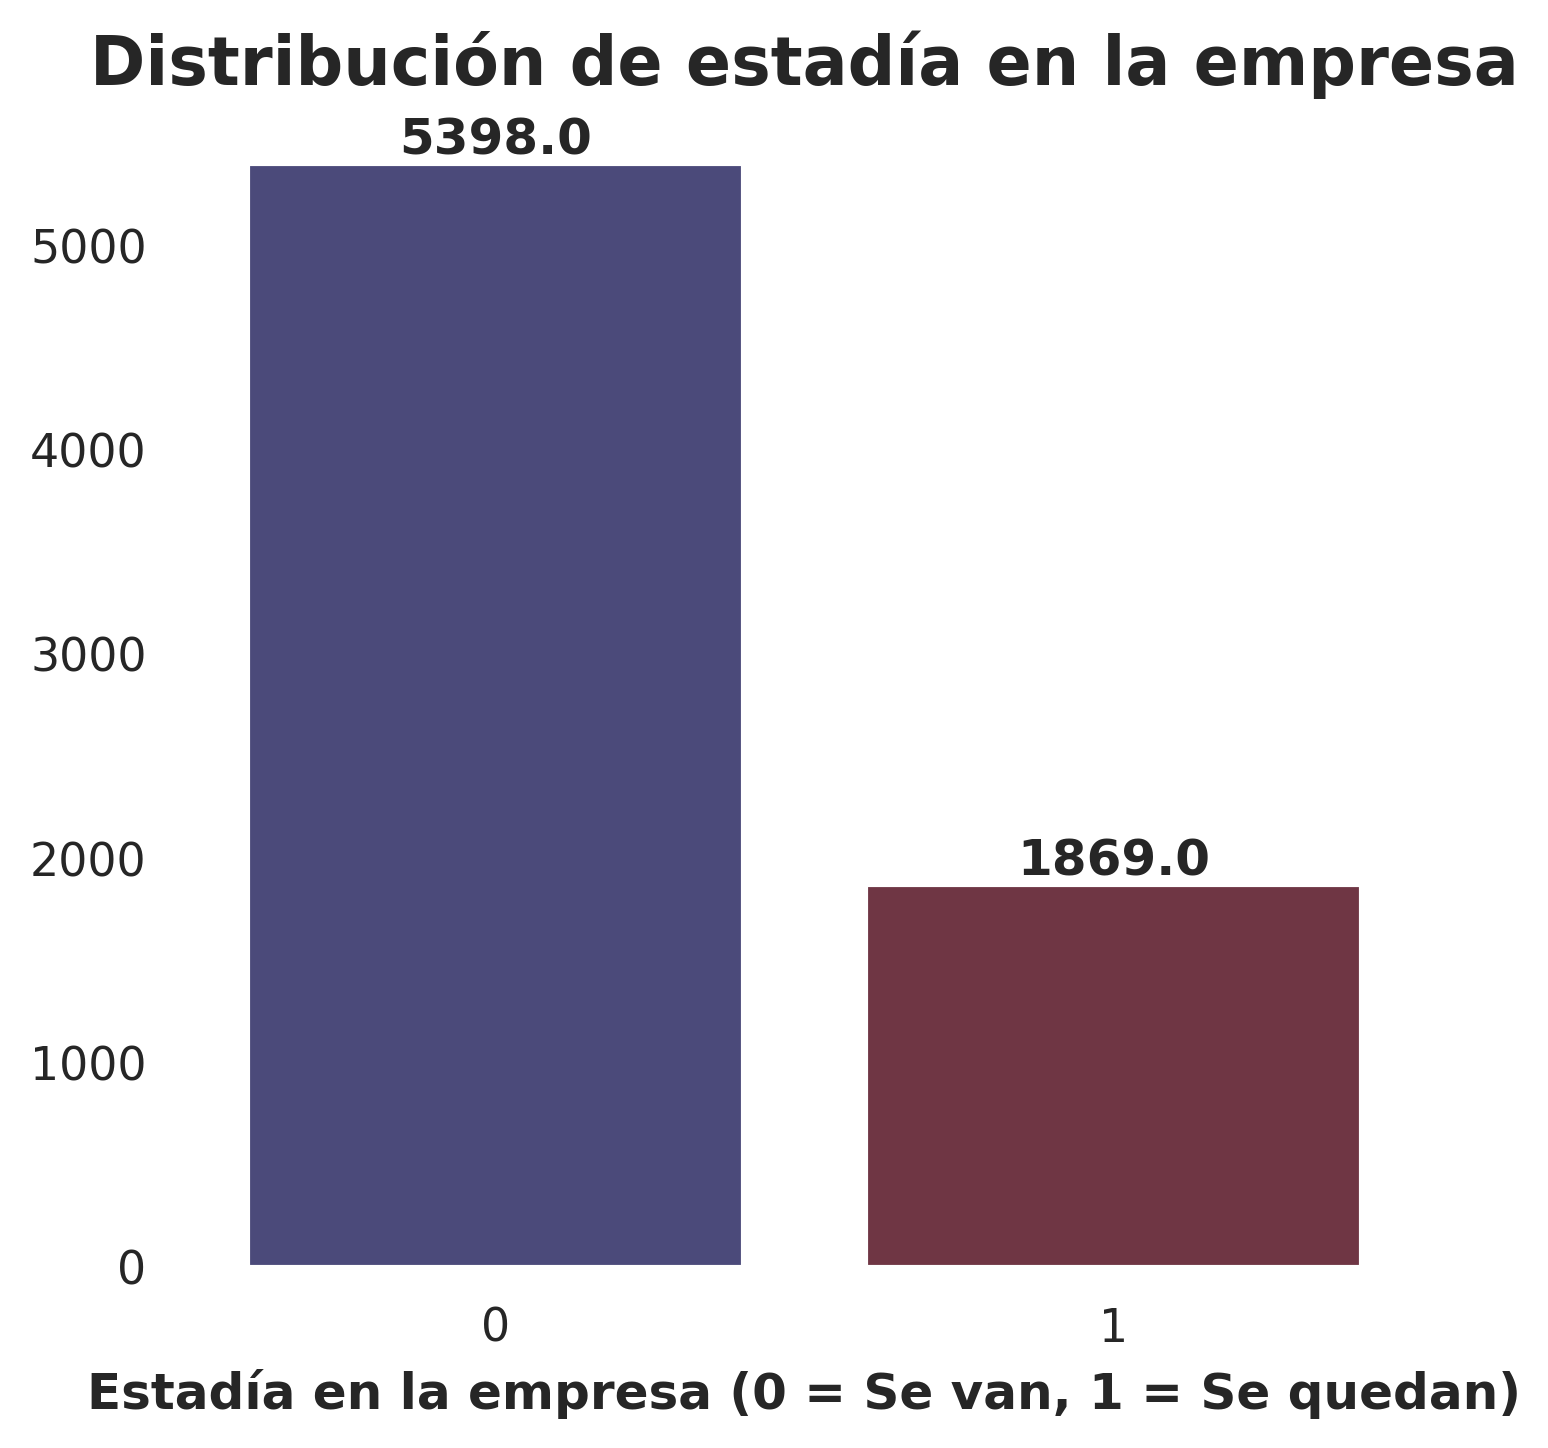

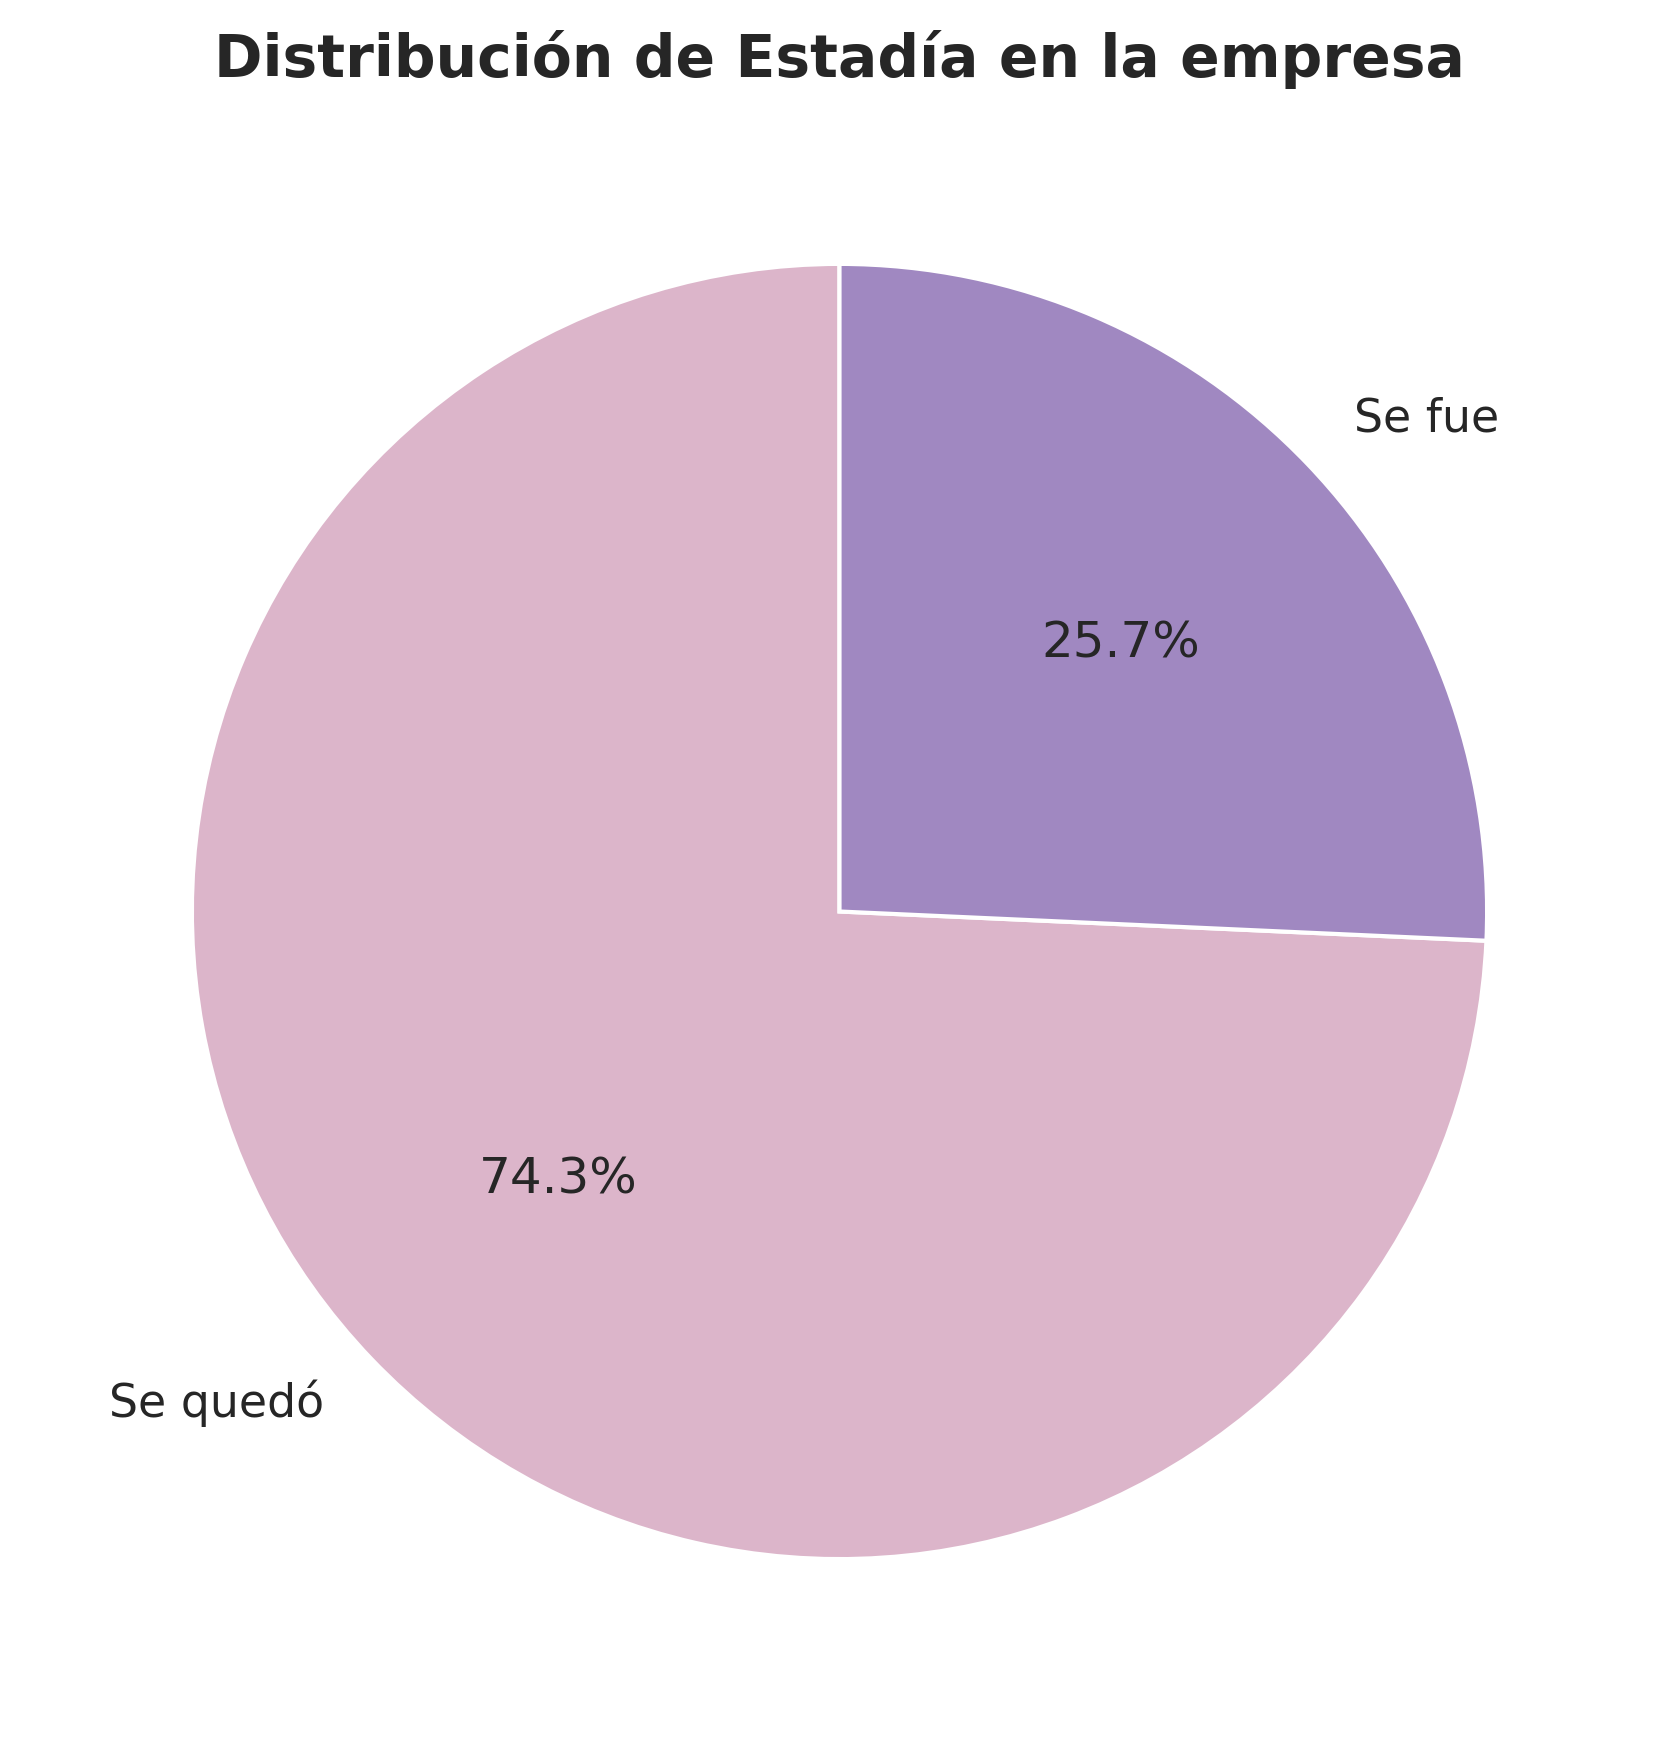

El an√°lisis demuestra que solo poco m√°s de un cuarto de los clientes se quedan, lo que demuestra que la preocupaci√≥n por el abandono excesivo de clientes es real, y de que es de vital importancia descubrir que lo desencadena.

### **Estad√≠a de la empresa frente a otras categorias**

#### **- G√©nero**

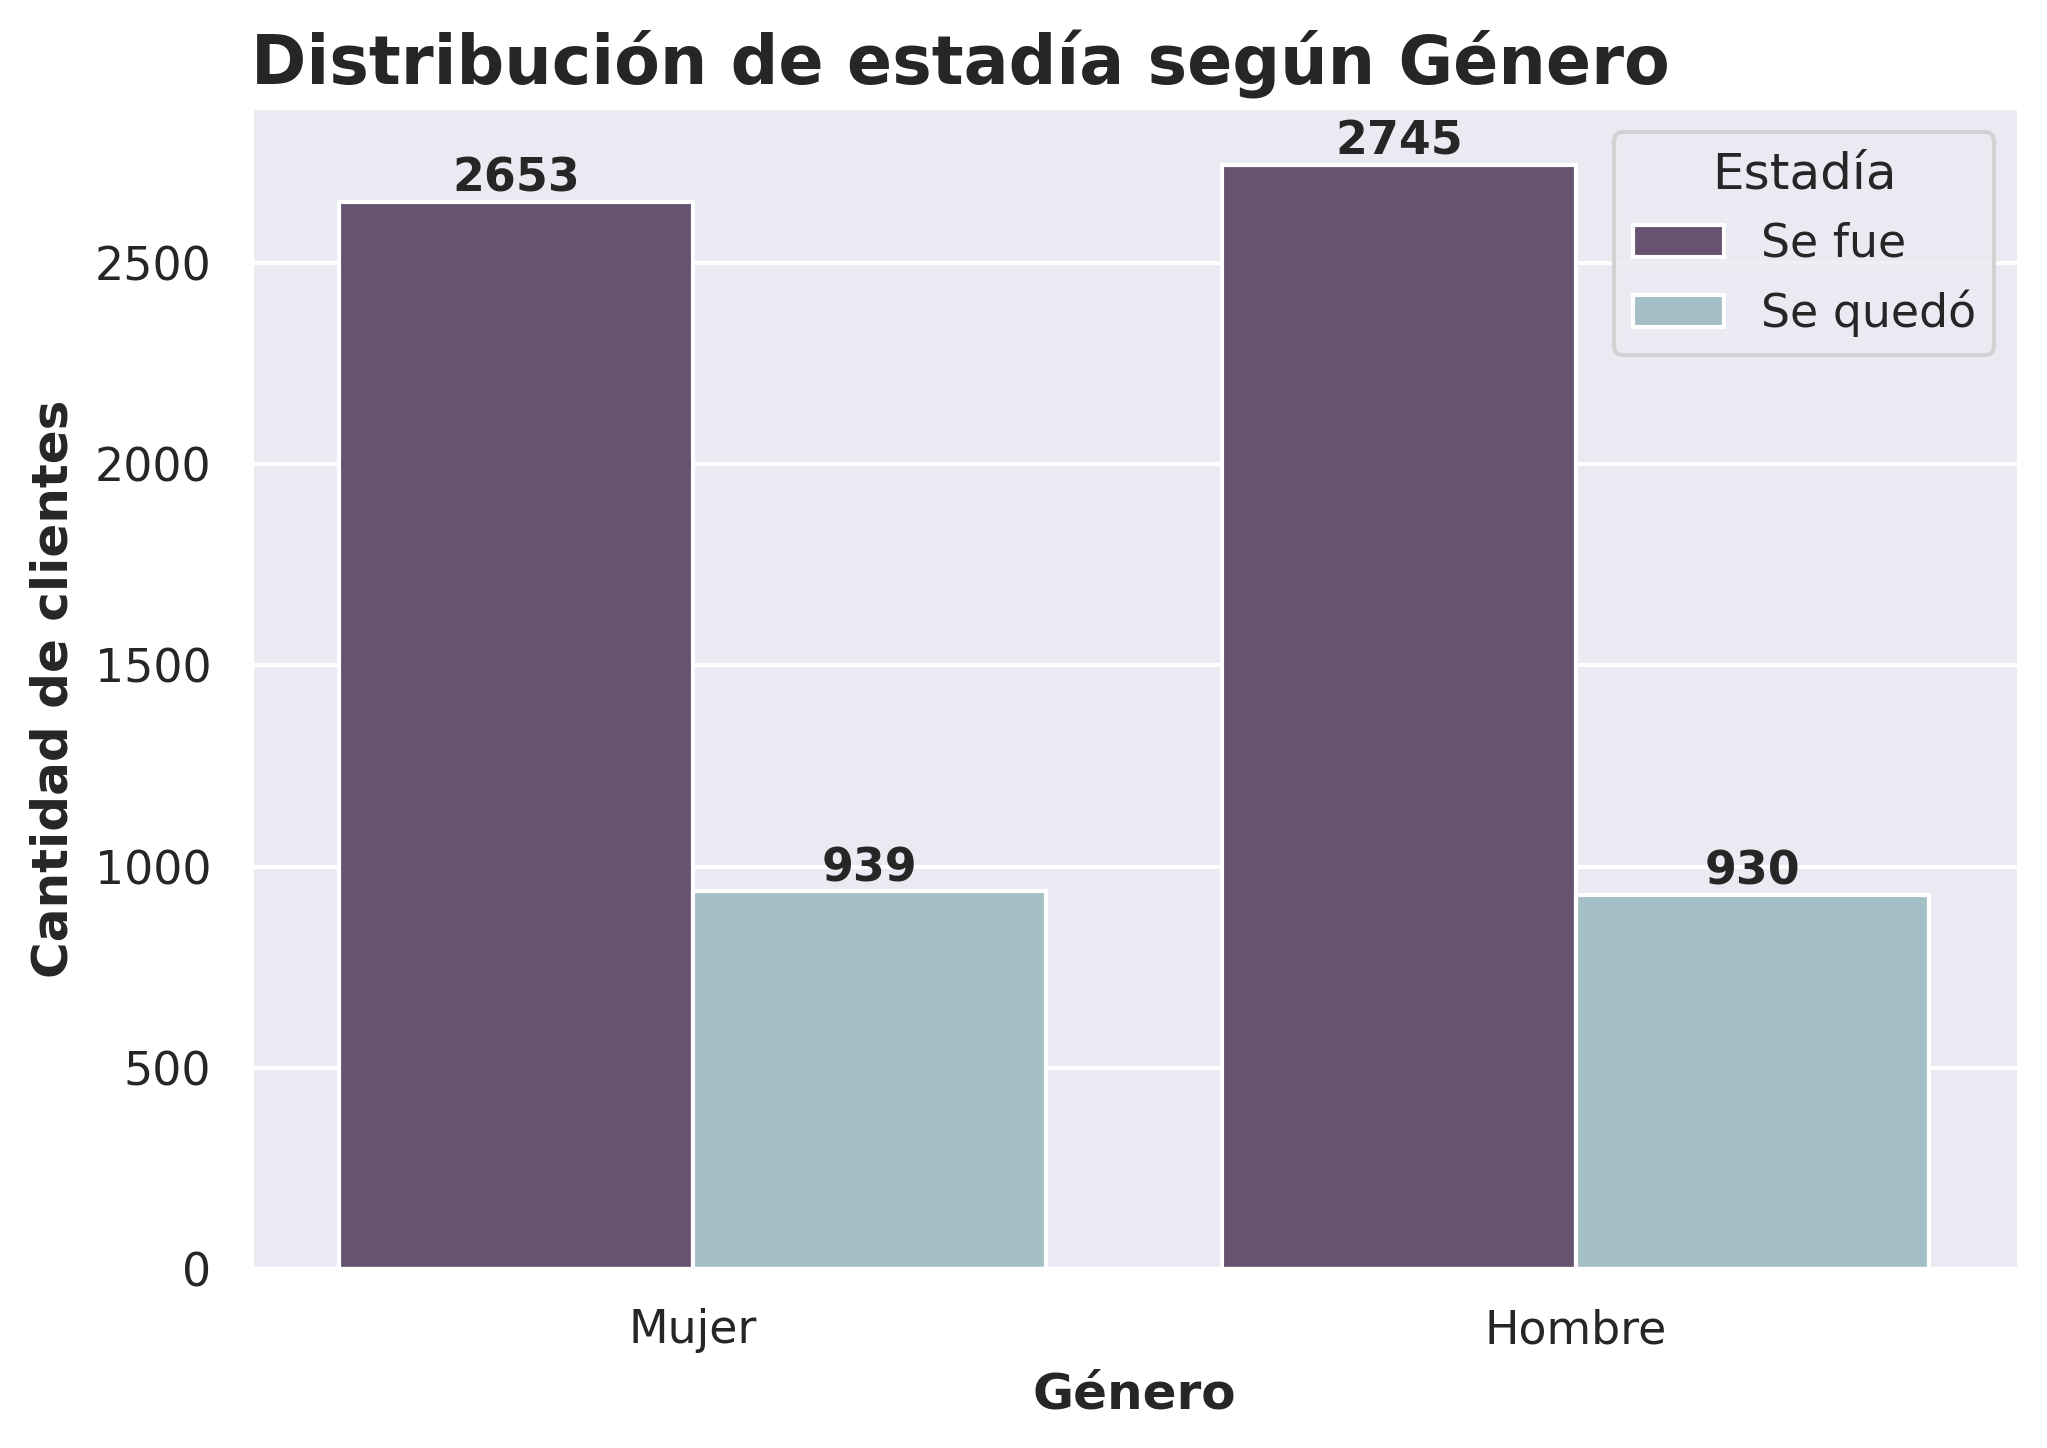

Los datos demuestran que no hay una diferencia significativa entre los dos generos que pueda mostrar un factor decisivo, lo que puede considerarse una virtud de que no se est√° marginando ni olvidando las necesidades particulares de un g√©nero, por otro lado hay que anotar la peque√±a diferencia de los hombres se van m√°s.

#### **- Tipo de contrato**

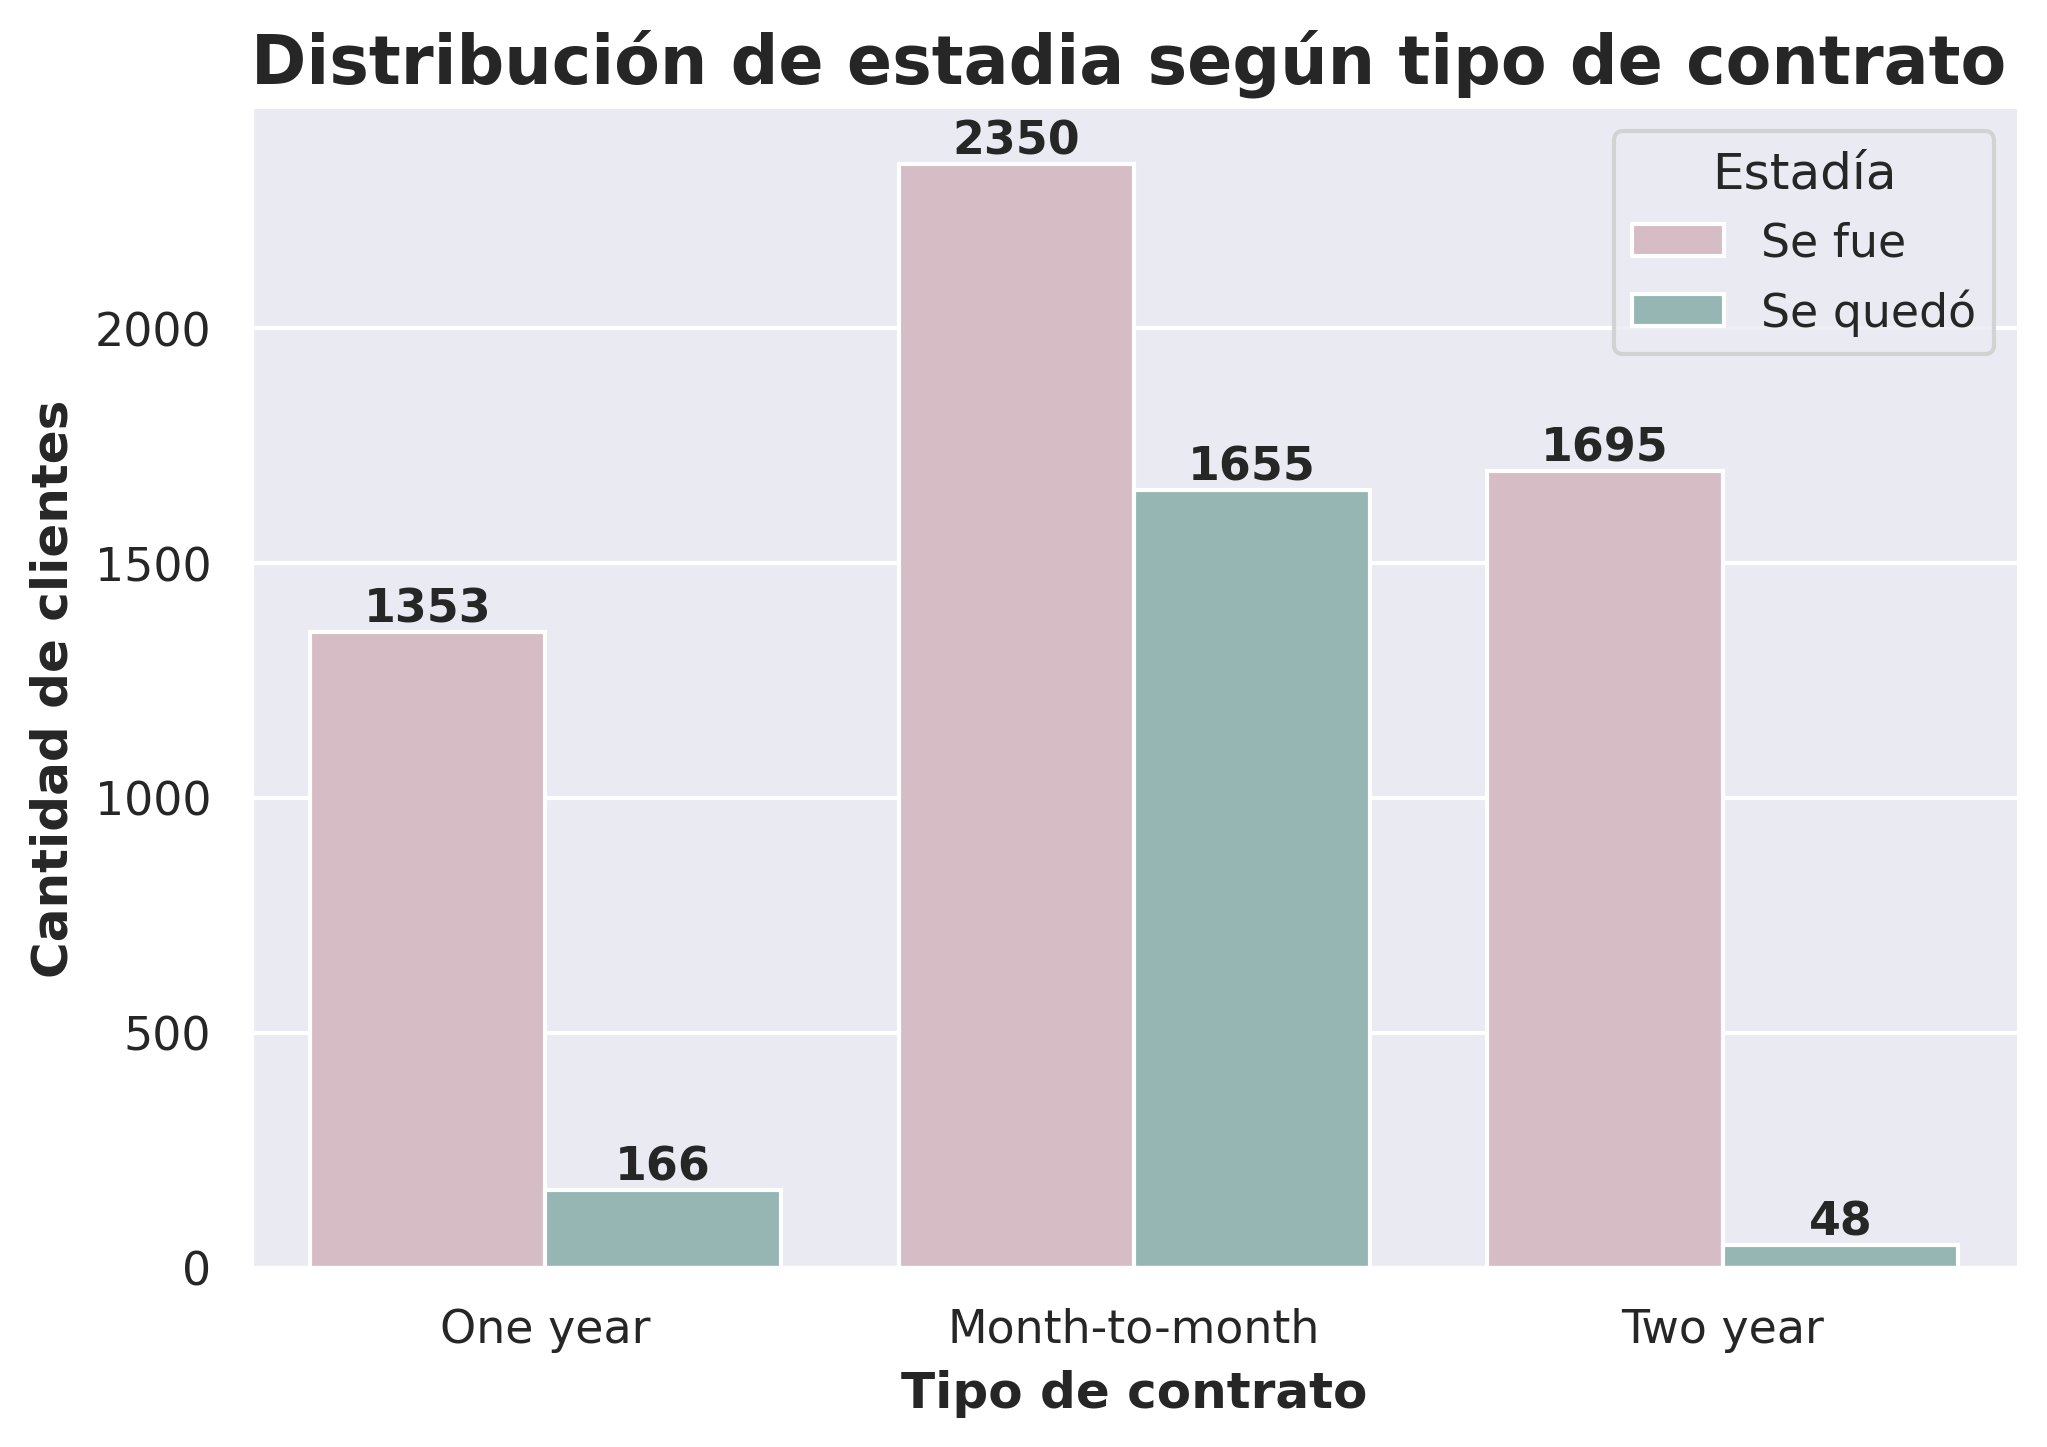

Los datos muestran que los contratos que hay m√°s son los de mes a mes, adem√°s que son con los que mayores se quedan los clientes. Mientras que los de un a√±o y dos a√±os son los que menos se quedan, demostrando que al ser tan largos puede afectar al compromiso de los clientes con la empresa.

Una propuesta podr√≠a ser la integraci√≥n de contratos con periodos intermedios, o caso de no ser beneficiosos, eliminar los contratos largos o solo ofrecerlos a clientes seleccionados.

#### **- Forma de pago**

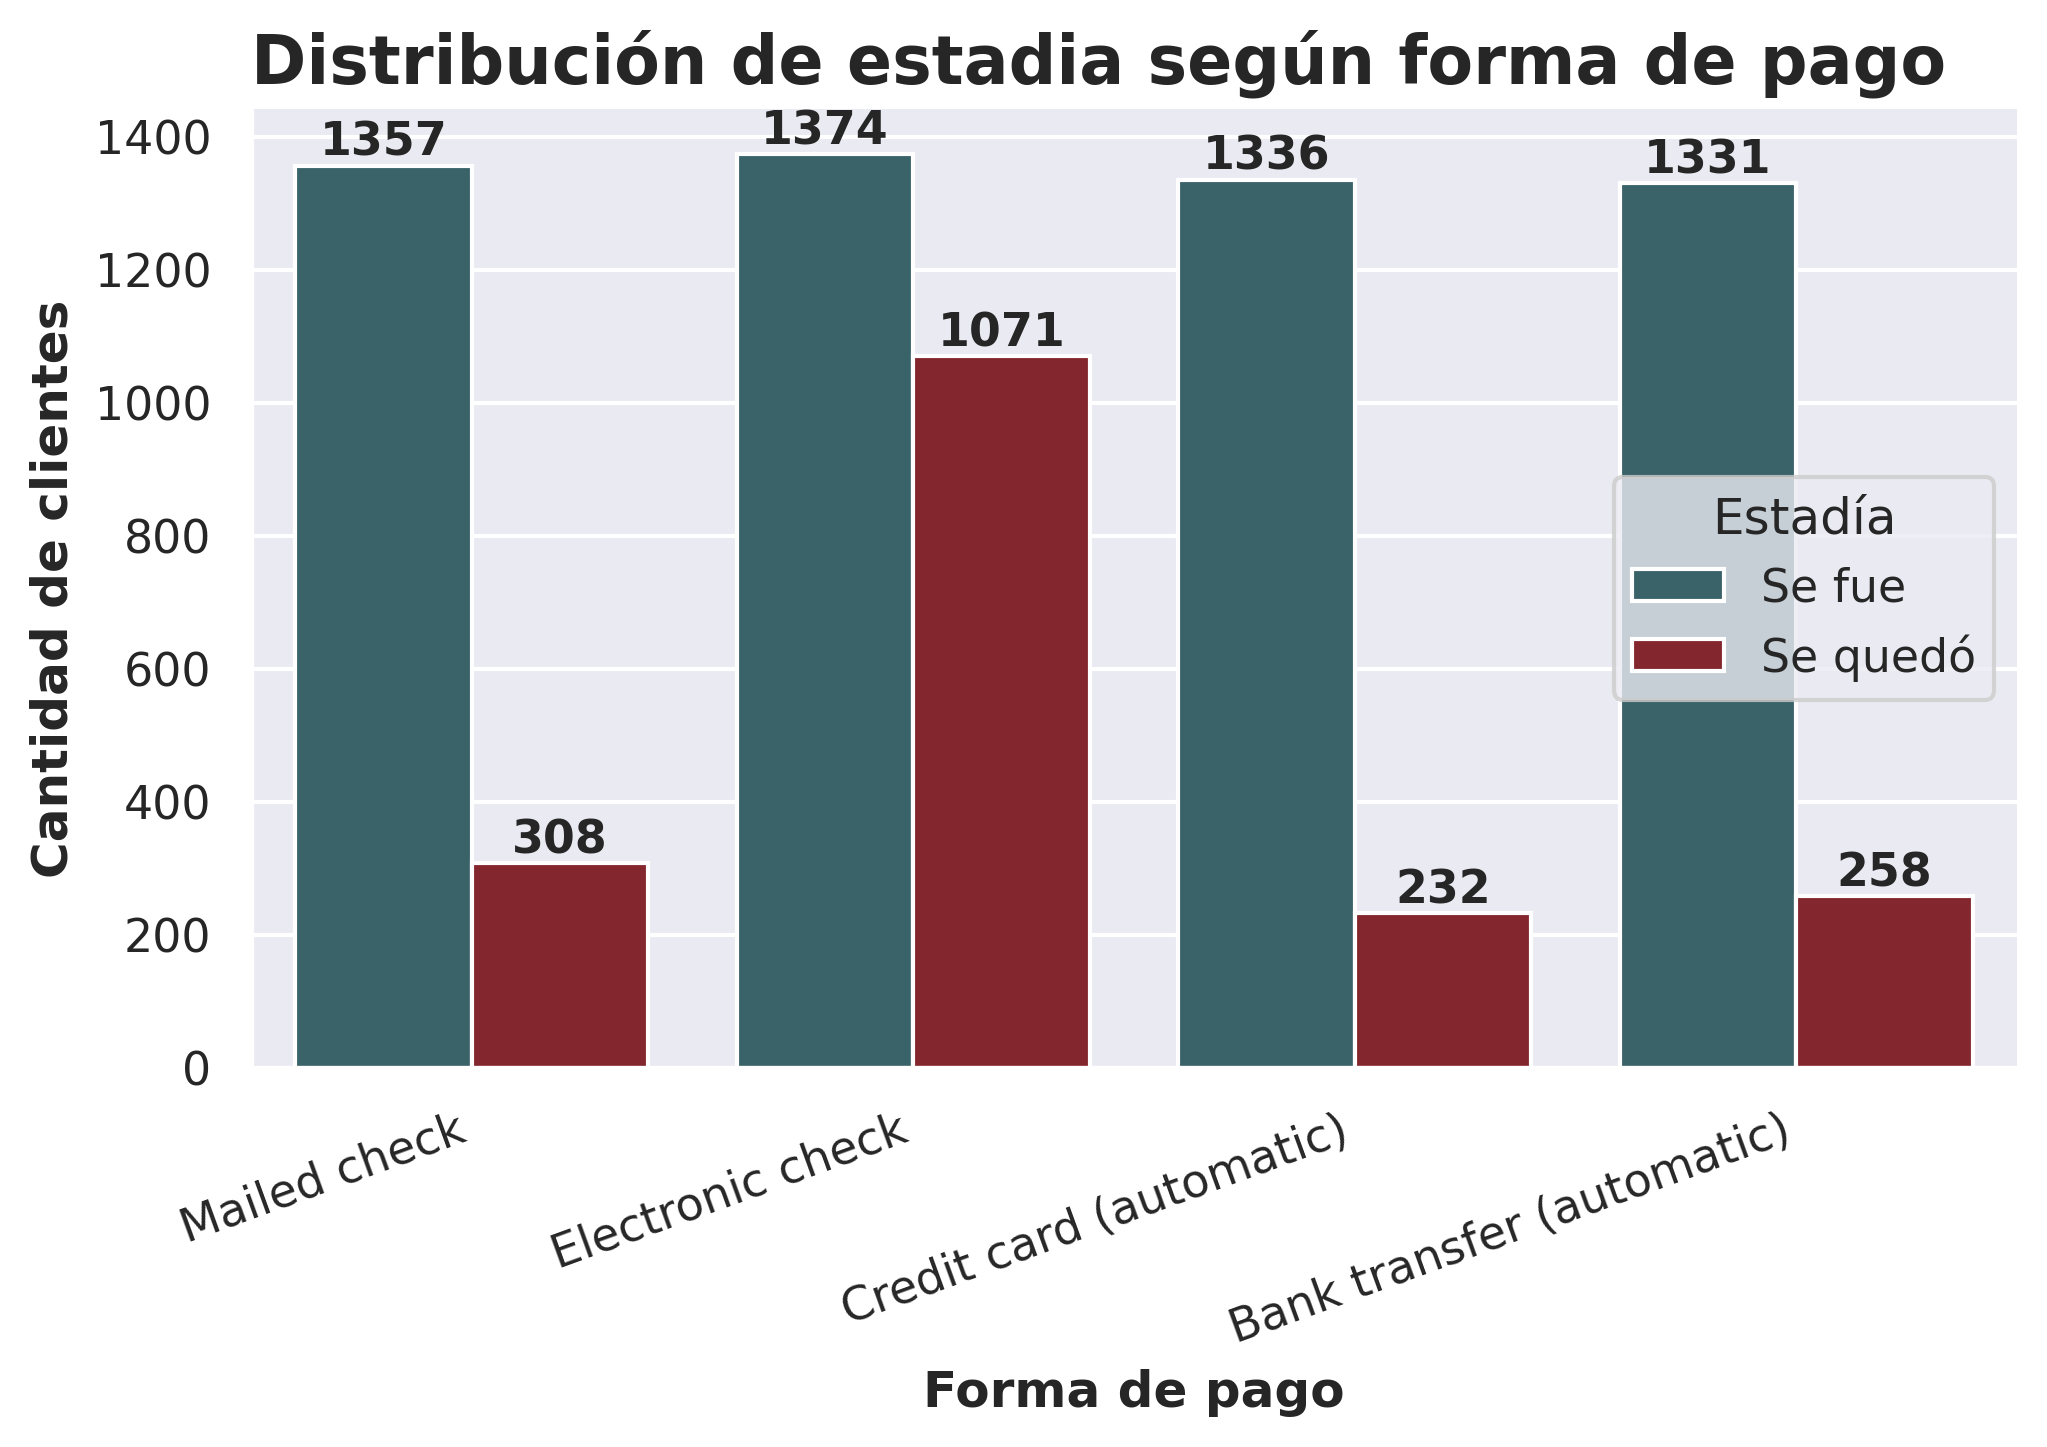

La gr√°fica demuestra que los clientes que mayores se quedan son los que pagan de manera electr√≥nica, mientras que los que m√°s se van son los que pagan de manera autom√°tica, como lo son por tarjeta de cr√©dito y por transferencia bancaria, siendo muy seguidos de cerca por los que pagan por correo.

Para este punto propongo investigacion m√°s profunda con respecto a estos clientes para analizar la ra√≠z de que no les guste esta forma de pago y de que otras maneras ser√≠an m√°s beneficios a la hora de la cobranza.

#### **- Proveedor de internet**

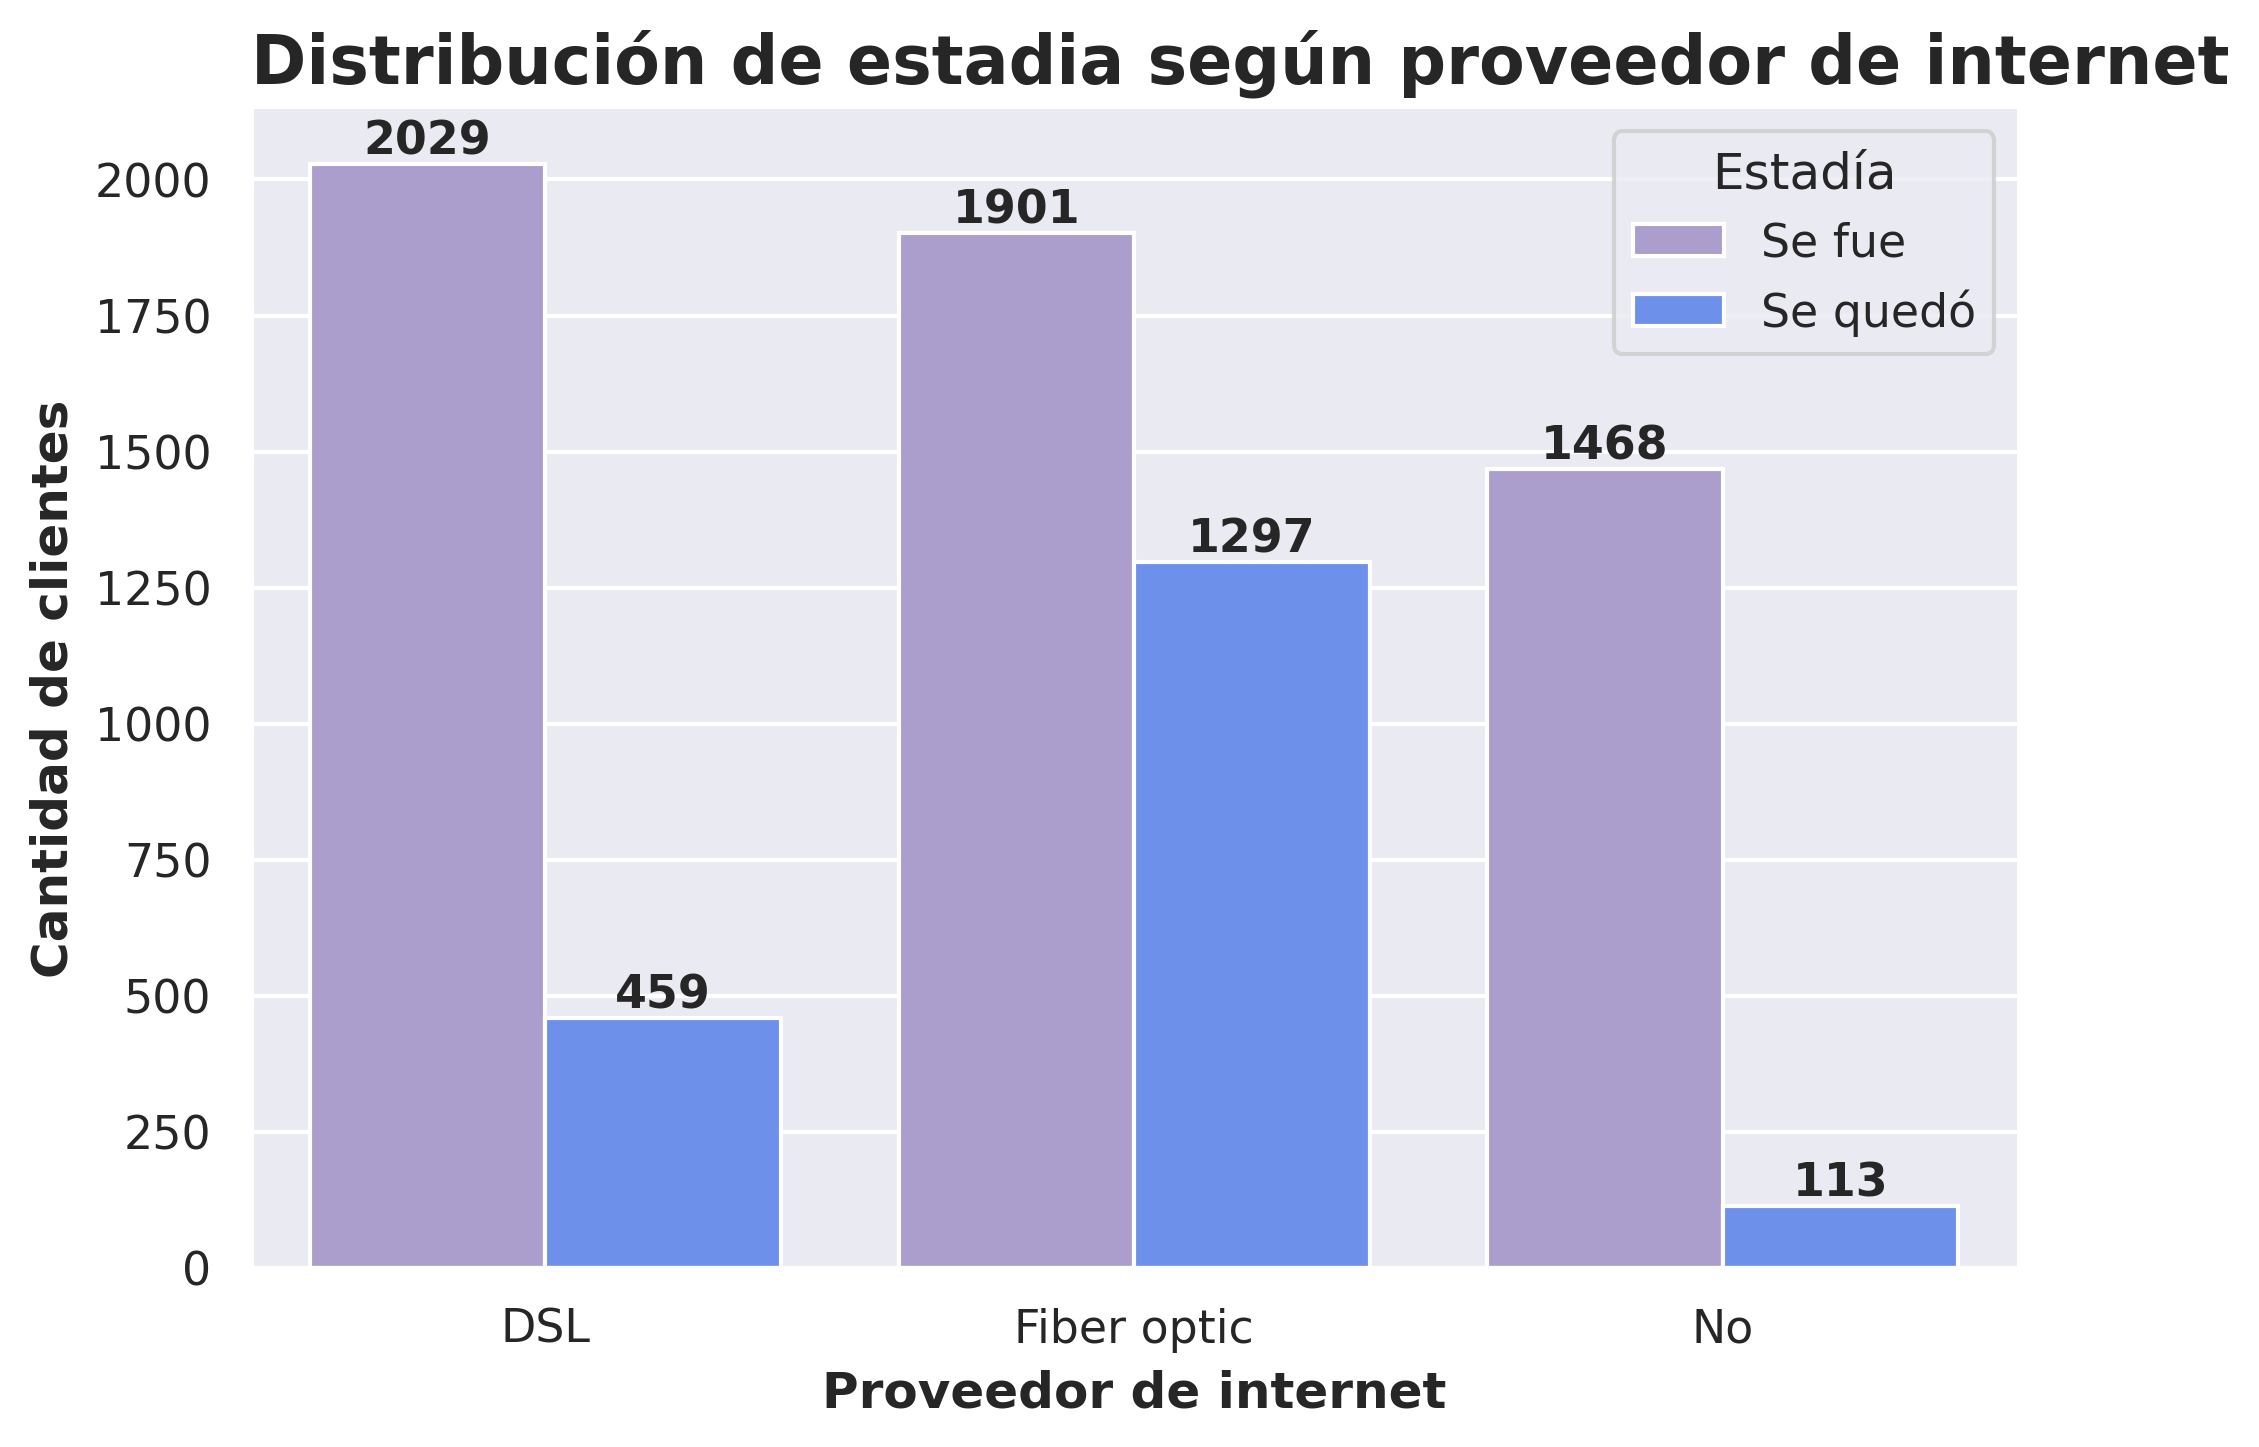

En este gr√°fico podemos observar que los que menos se quedaron, fueron los que tienen fibra optica, mientras que los que no tienen o cuentan con DSL son los que m√°s se fueron.

Propongo un an√°lisis m√°s profundo de porque los clientes prefieren la fibra √≥ptima y como esta se les puede proporcionar a m√°s clientes.

#### **- L√≠neas m√∫ltiples**

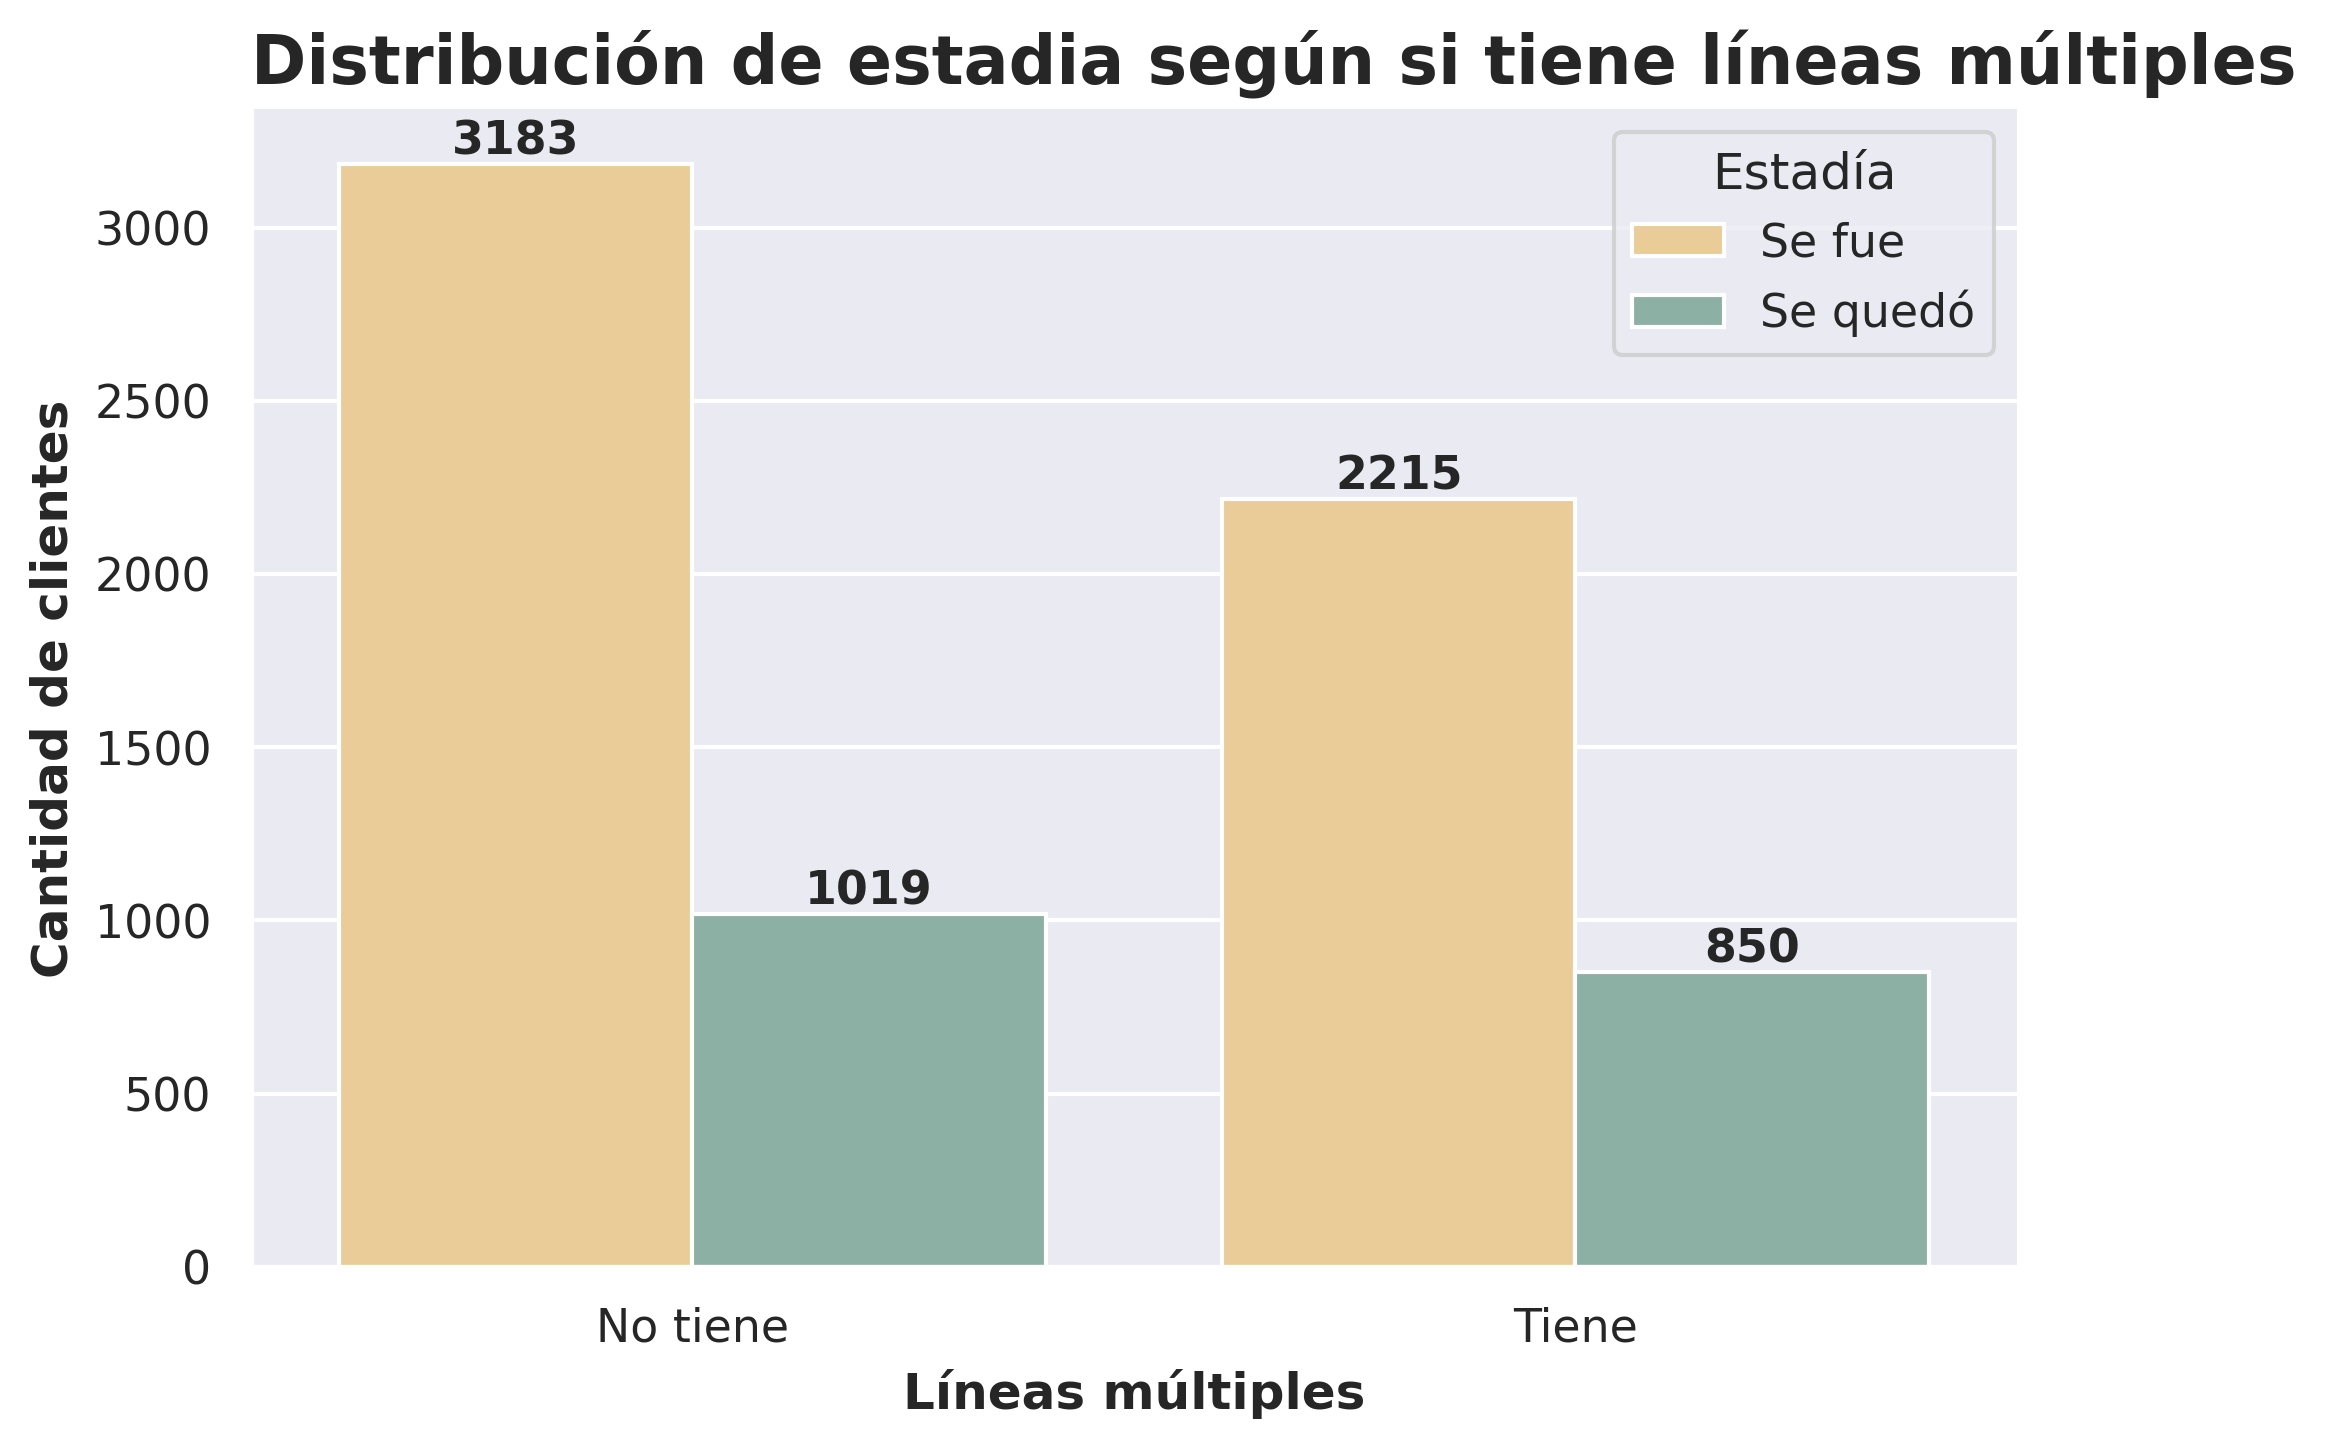

En esta gr√°fica podemoso observar que los que no tienen fueron los m√°s se fueron, lo que puede implicar que nuestro servicio de m√∫ltiples l√≠neas le resulta beneficioso para los que lo tienen, y puede deducirse que es una raz√≥n beneficiosa para quedarse.

#### **- Dependientes**

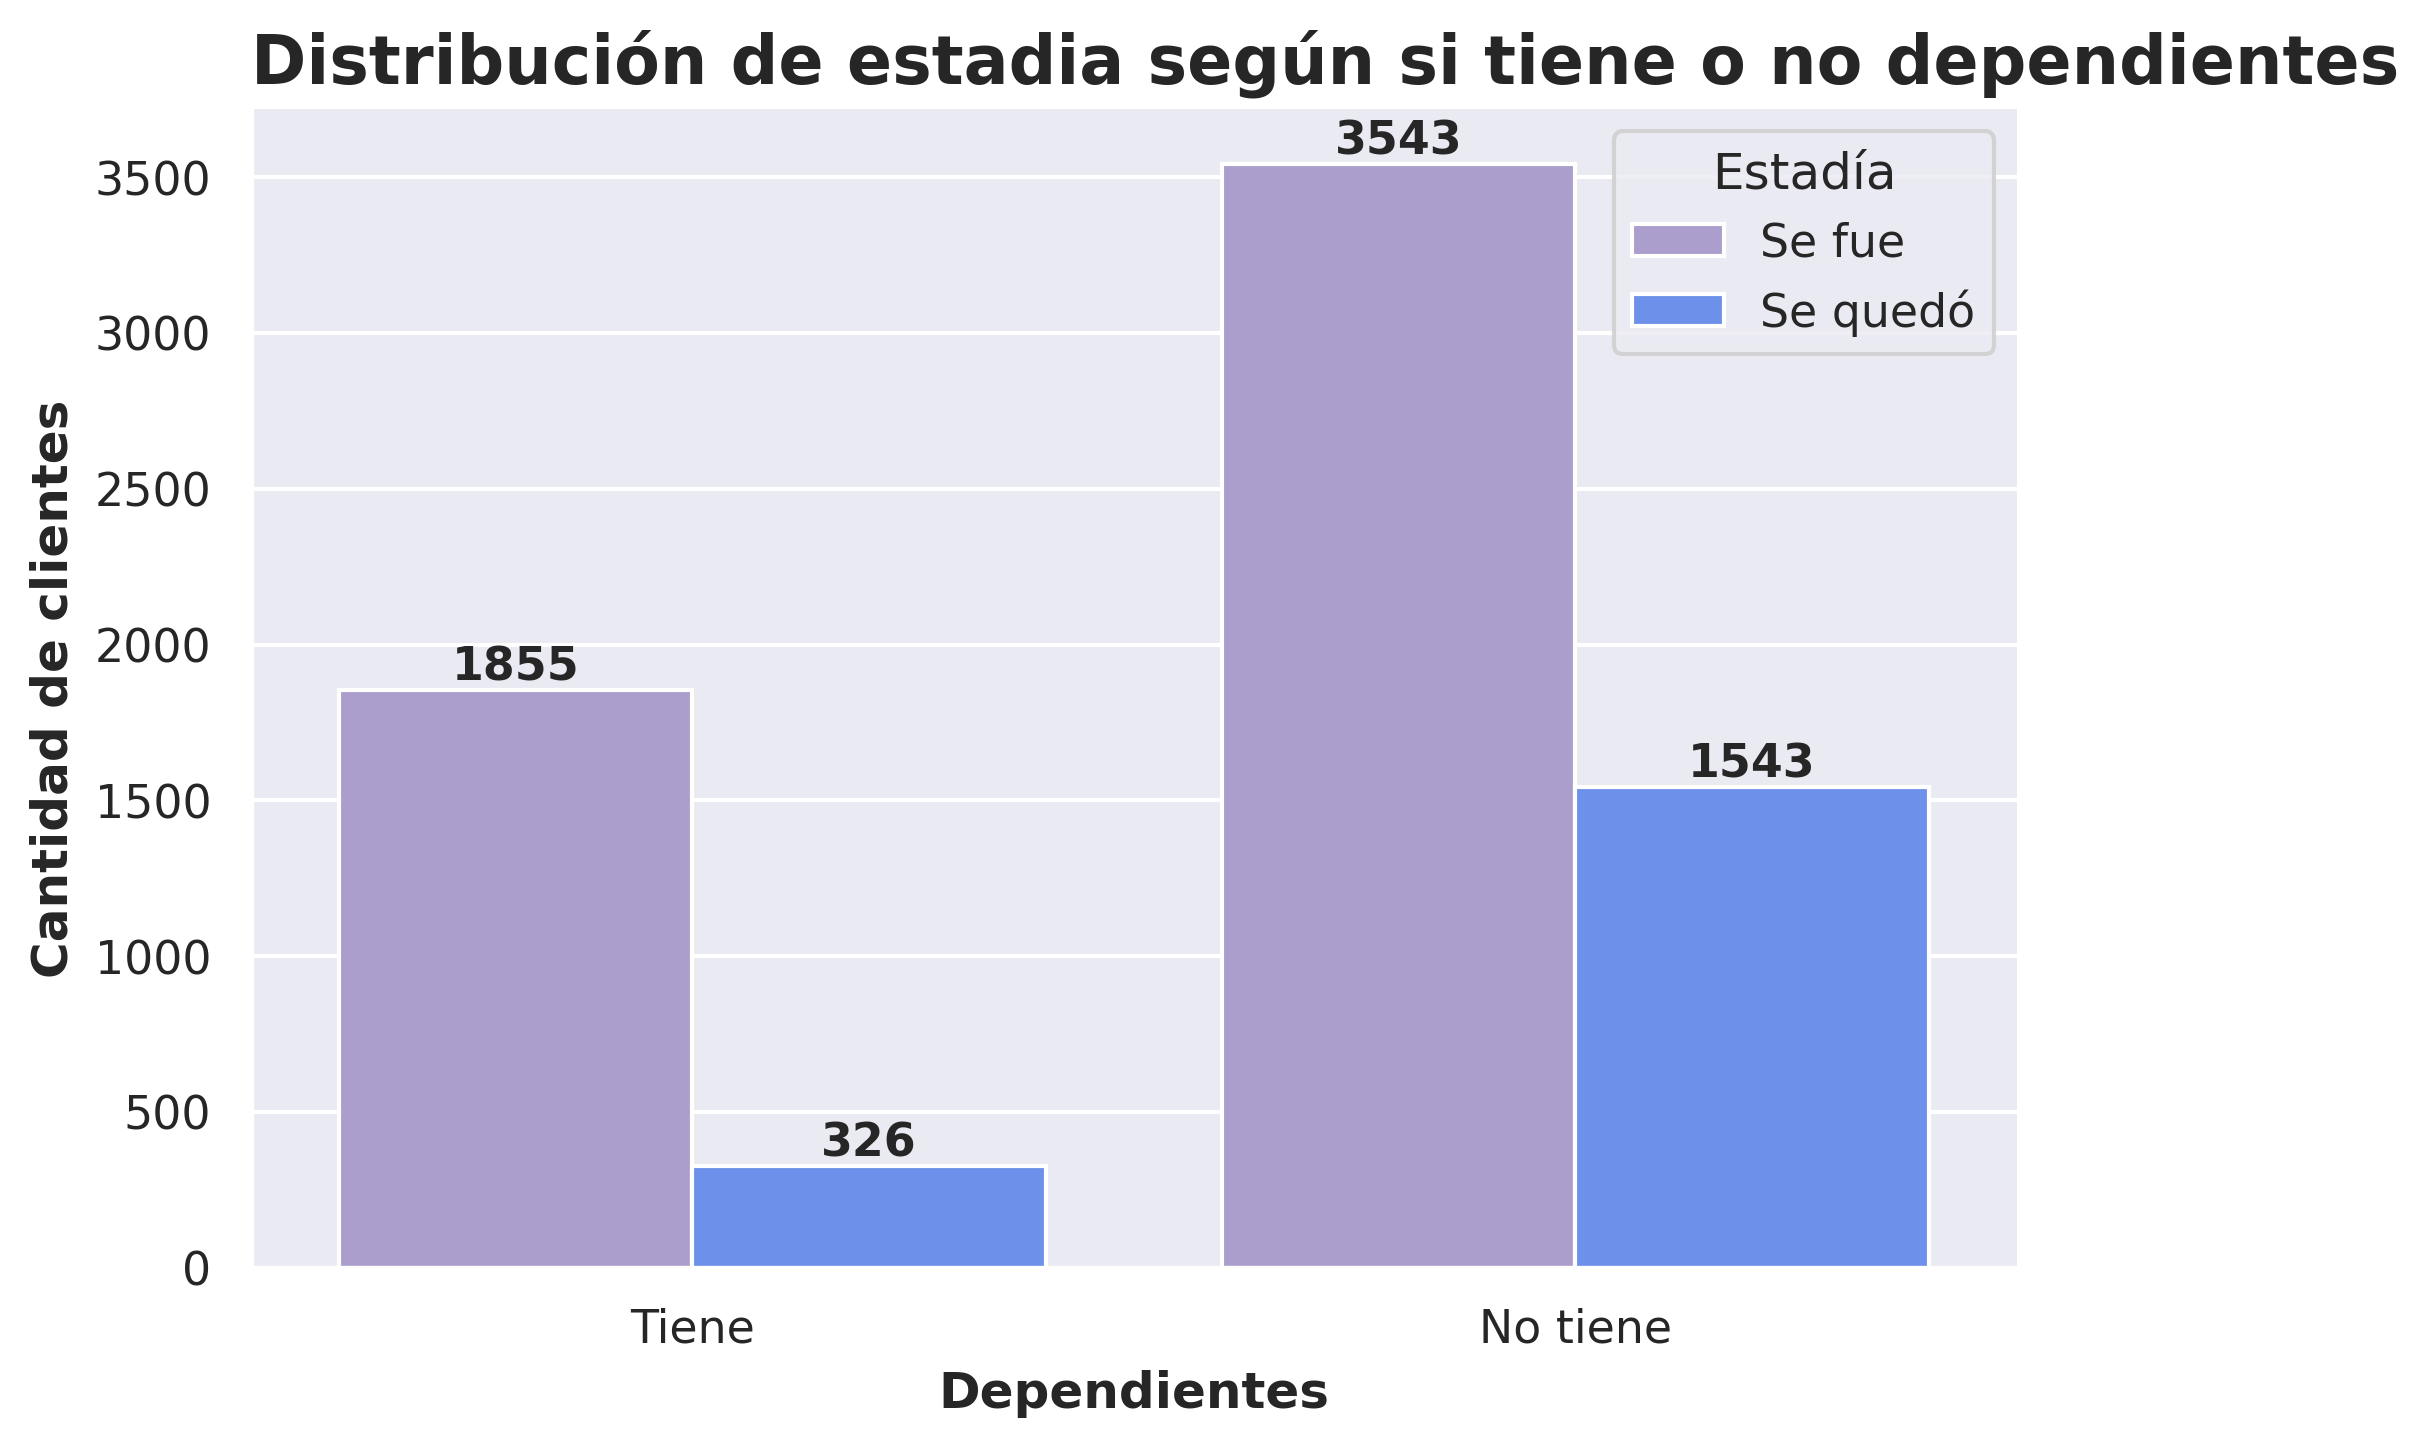

A simple vista en este gr√°fico puede parecer que los que tienen dependientes se fueron menos, pero comparando la lonitud de ambas barras podemos observar que los que no tienen dependientes fueron los que se quedaron m√°s. A esto podemos intuir que consideran nuestro servicio como algo que no es de primera necesidad, por lo que deciden cancelarlo los que tienen dependientes.

Propongo crear estrategias que contengan servicios personalizados a los que tienen dependientes.

#### **- Tiempo en contrato**

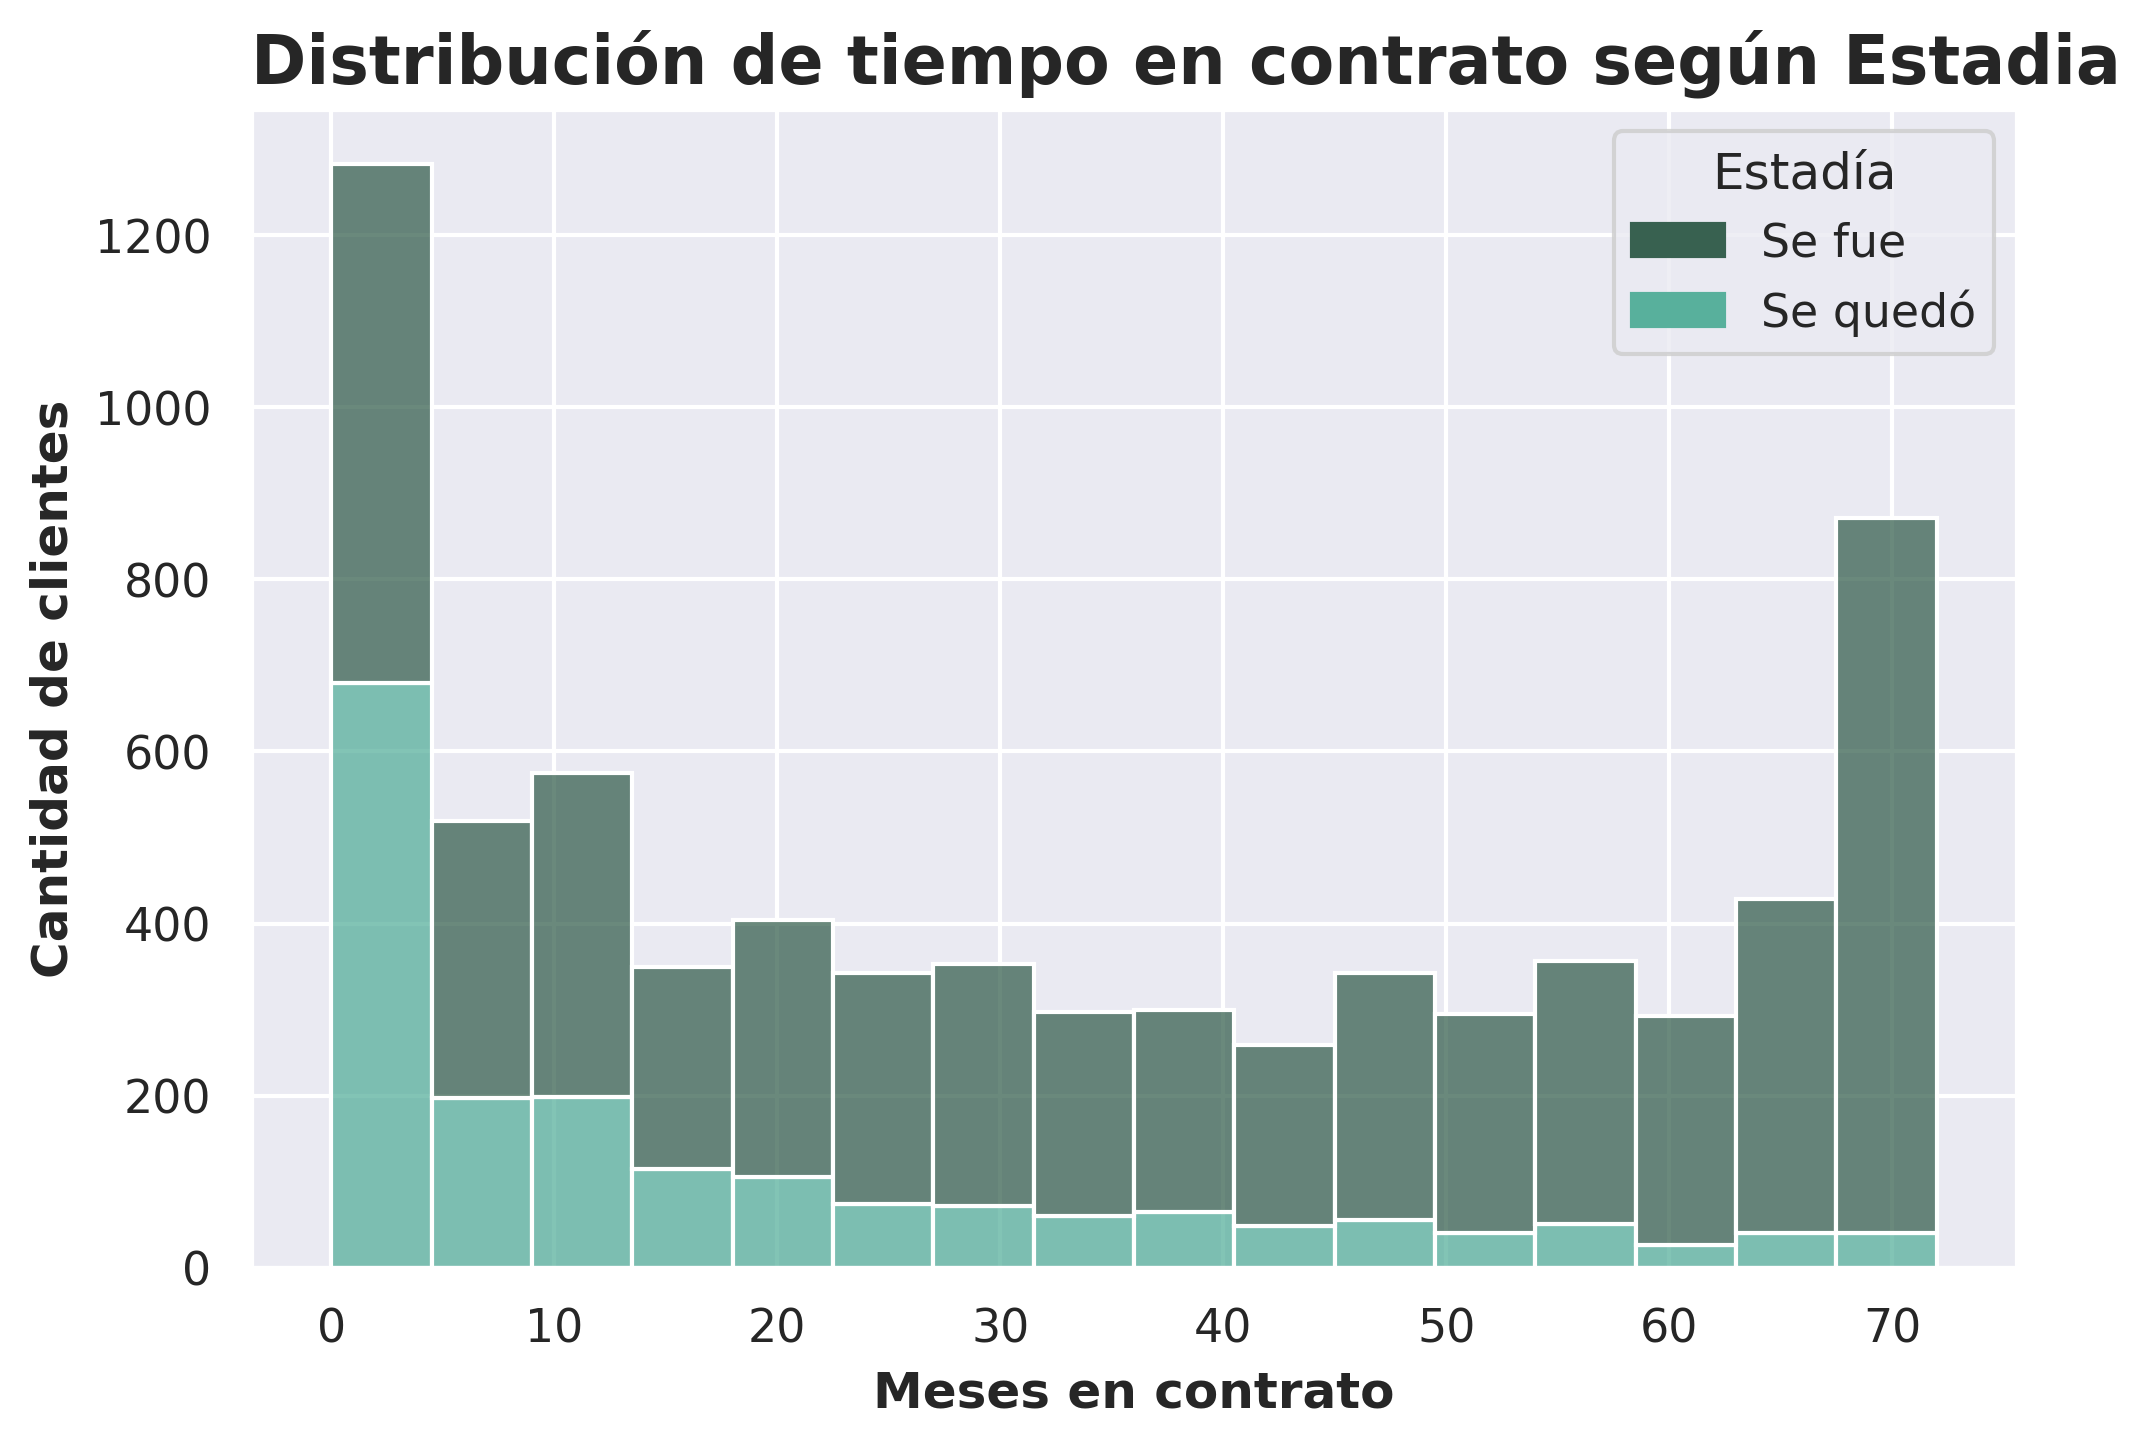

En este gr√°fico podemos analizar que los que m√°s se quedaron tambi√©n fueron de los que m√°s se fueron, siendo los de tiempo m√°s cortos, mientras que en definitiva los contratos que tienen mayor n√∫mero de bajas son los de 70 meses, confirmando lo que vimos en la gr√°fica de tipo de contrato, que mientras m√°s largo el periodo, es m√°s probable que se vayan.

#### **- Gastos totales**

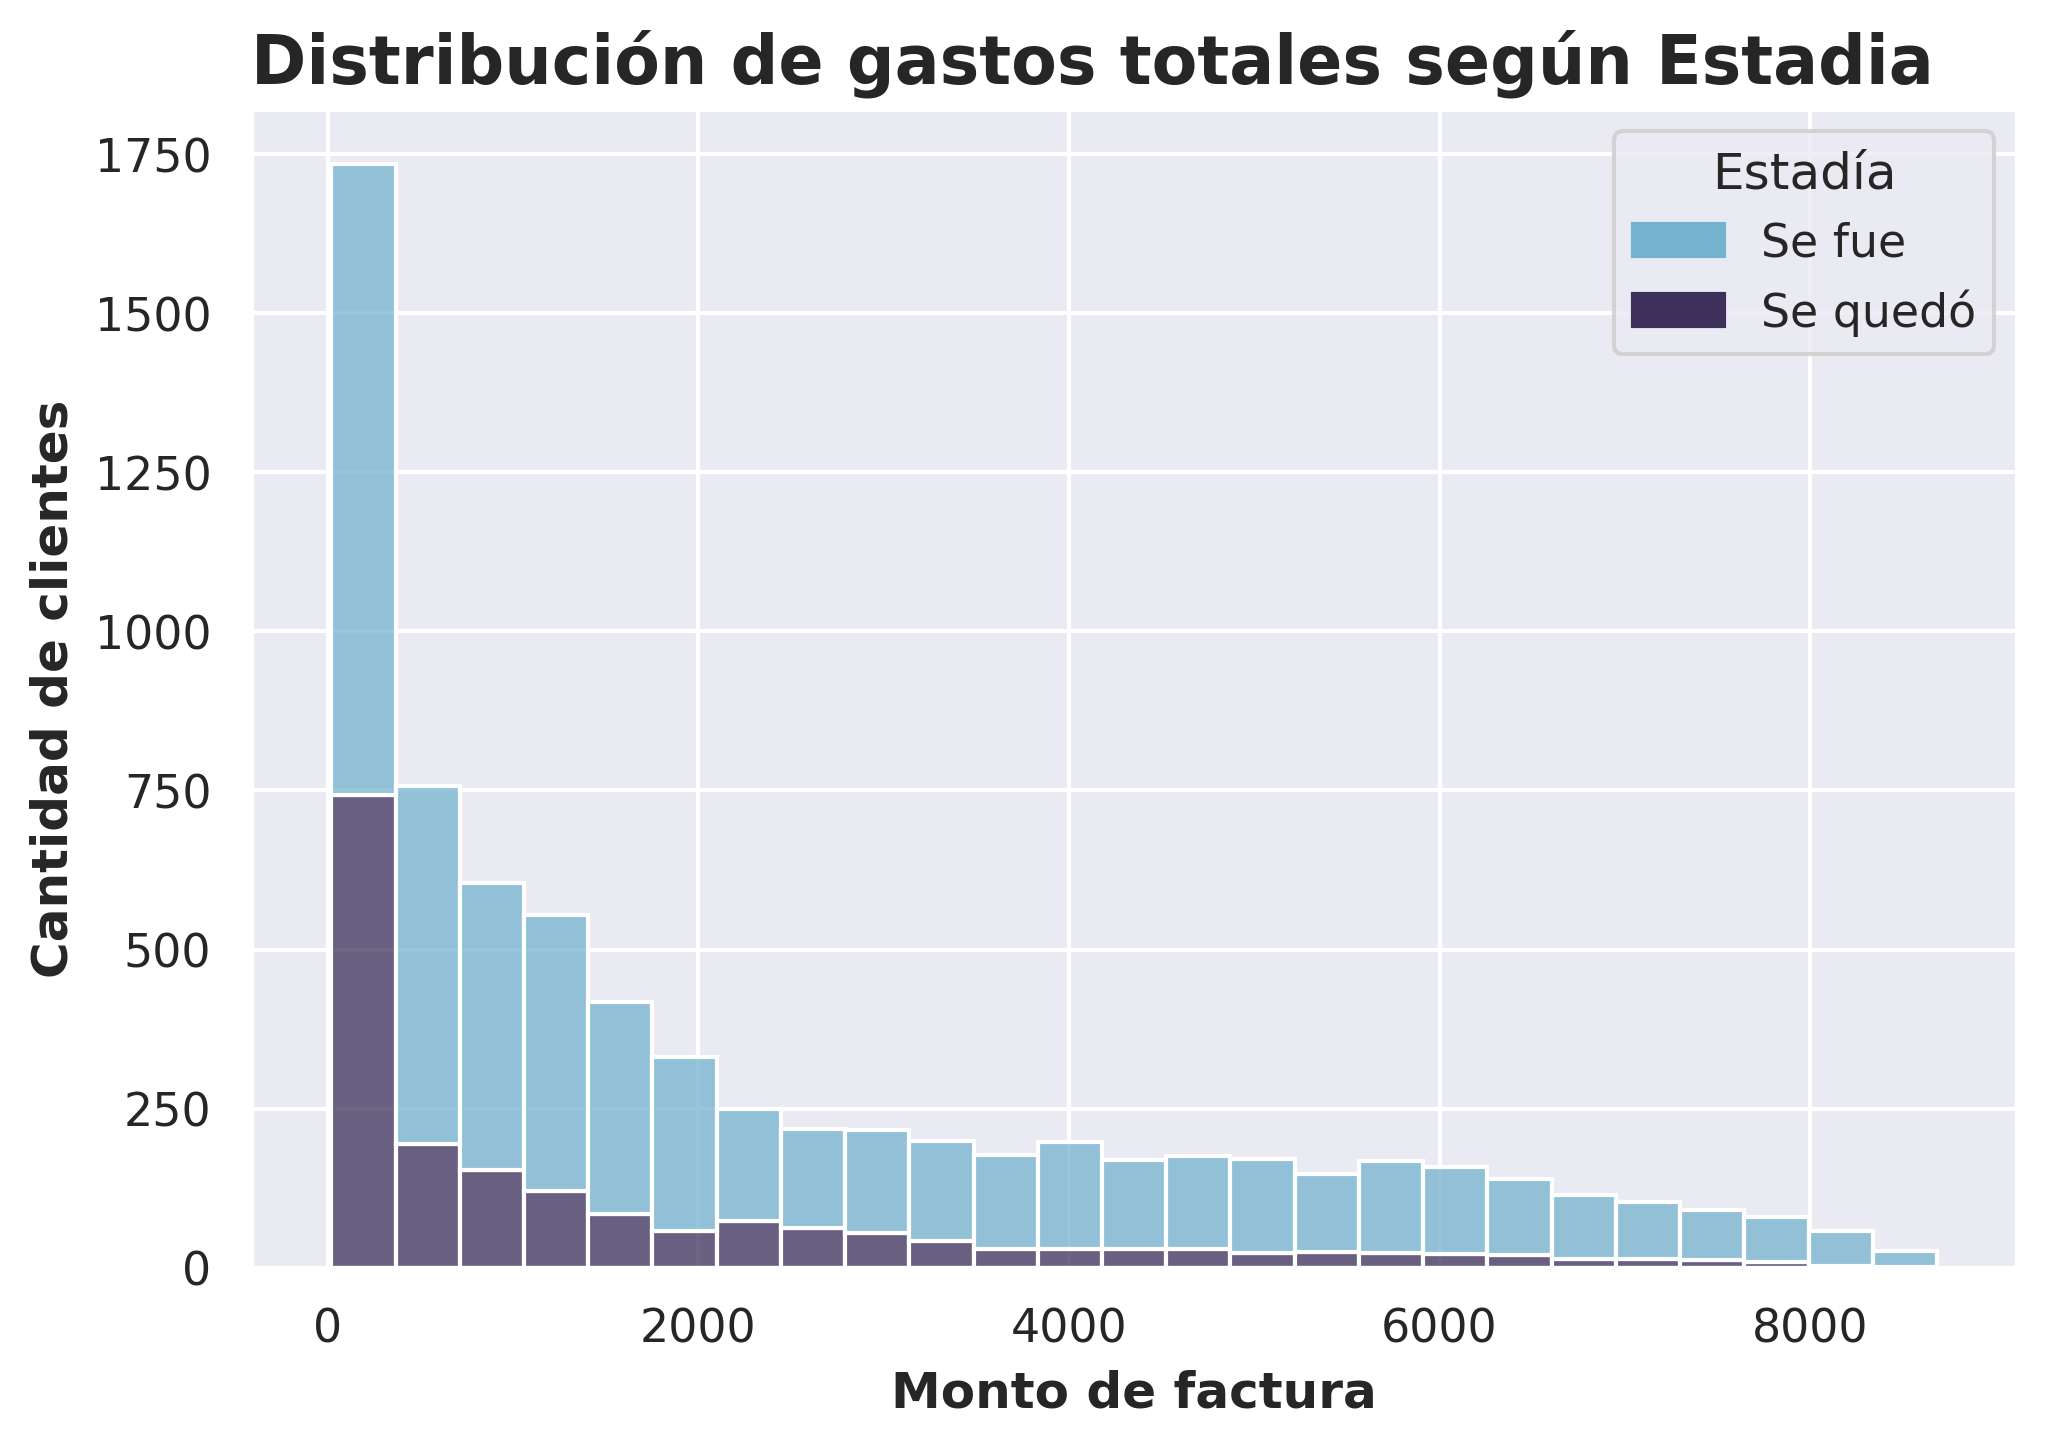

Finalmente enesta √∫ltima gr√°fica podemos ver que los que tienen costos m√°s bajos son los menos propensos a irse. En est√° gr√°fica las proporciones de irse son tan altas que no considero que se pueda hacer un an√°lisis conforme cada rango de precios.

### **Correlaci√≥n**

In [61]:
correlacion

estadia_empresa
estadia_empresa                 1.000000
adulto_mayor                    0.146733
pareja                         -0.148546
dependientes                   -0.161384
meses_contrato                 -0.344079
servicio_telefono               0.012571
lineas_multiples                0.039343
seguridad_linea                -0.166828
respaldo_linea                 -0.080163
proteccion_adicional           -0.063452
soporte_tecnico                -0.160440
suscripcion_tv                  0.062430
suscripcion_peliculas           0.060586
facturacion_electronica         0.186666
gastos_mensuales                0.189866
gastos_totales                 -0.194440
cuentas_diarias                 0.189866

Viendo las correlaciones podemos deducir que los que son m√°s probables de quedarse son los que hacen facturaci√≥n electronica y posteriormente los clientes que son adultos mayores. Mientras que los que son m√°s probables de irse son los que tienen los servicios de seguridad adicional y de soporte t√©cnico, en la decisi√≥n parece tambi√©n influir los clientes que tienen pareja.

### M√°s servicios

In [62]:
correlacion_servicios

total_servicios  estadia_empresa
total_servicios         1.000000        -0.064642
estadia_empresa        -0.064642         1.000000

Aqu√≠ podemos analizar que no a pesar de ser menor a cero, la relaci√≥n no es lo suficientemente significativa para ver una l√≠nea clara entre las variables.

## **Conclusiones e Insights**

El an√°lisis realizado sugiere que no existen diferencias de g√©nero lo suficientemente marcadas como para atribuirle un impacto decisivo en la evasi√≥n, lo cual puede interpretarse positivamente como una equidad en el servicio. No obstante, se detecta una ligera tendencia a que los hombres abandonen m√°s la empresa. En cuanto a los tipos de contrato, se observa que los contratos mensuales no solo son los m√°s comunes, sino tambi√©n los que retienen m√°s clientes, en contraste con los contratos anuales o bianuales, que tienden a presentar una mayor tasa de cancelaci√≥n, posiblemente por su compromiso prolongado.

Respecto a la forma de pago, los usuarios que optan por facturaci√≥n electr√≥nica tienden a quedarse m√°s, mientras que aquellos que usan m√©todos autom√°ticos como tarjetas de cr√©dito o transferencias bancarias, junto con quienes pagan por correo, presentan una mayor tasa de deserci√≥n. En t√©rminos de infraestructura, sorprendentemente, los clientes con fibra √≥ptica muestran mayores tasas de abandono en comparaci√≥n con quienes no tienen servicio o usan DSL, lo cual puede deberse a otros factores externos no visibles en este an√°lisis.

El uso de m√∫ltiples l√≠neas muestra una relaci√≥n positiva con la retenci√≥n de clientes, lo que indica que los usuarios que perciben mayor valor en el servicio tienden a mantenerse. En contraste, los clientes con dependientes tienen tasas m√°s altas de abandono, lo que podr√≠a reflejar una necesidad de priorizar otros gastos o percepciones de que el servicio no es esencial.

El tiempo de contrato refuerza las conclusiones anteriores: los clientes con periodos contractuales m√°s extensos (especialmente alrededor de los 70 meses) tienen una mayor propensi√≥n a dejar el servicio. Finalmente, los gastos totales tambi√©n influyen: quienes tienen costos m√°s bajos tienden a permanecer, aunque la dispersi√≥n en los datos hace dif√≠cil establecer una tendencia clara. En t√©rminos de correlaci√≥n, destaca que la facturaci√≥n electr√≥nica y la edad (adulto mayor) se asocian positivamente con la permanencia, mientras que servicios adicionales como soporte t√©cnico o seguridad, as√≠ como ciertas caracter√≠sticas personales como tener pareja, muestran correlaci√≥n con la evasi√≥n.

## **Recomendaciones**

- Revisar y redise√±ar los contratos largos, ofreciendo alternativas intermedias o dirigidas a perfiles espec√≠ficos de clientes que se sientan c√≥modos con compromisos extendidos.

- Impulsar la facturaci√≥n electr√≥nica como medio principal, ya que est√° fuertemente relacionada con la retenci√≥n de clientes.

- Realizar una investigaci√≥n cualitativa sobre m√©todos de pago, especialmente aquellos con alta tasa de evasi√≥n, para ajustar estrategias de cobranza m√°s alineadas a las preferencias del cliente.

- Evaluar la percepci√≥n del servicio de fibra √≥ptica, dado que presenta una tasa inesperadamente alta de deserci√≥n.

- Promover el uso de m√∫ltiples l√≠neas con estrategias comerciales que resalten sus beneficios, ya que est√° asociado a mayor retenci√≥n.

- Desarrollar campa√±as orientadas a clientes con dependientes, personalizando servicios o beneficios que se ajusten a sus prioridades familiares.

- Seguir monitoreando los servicios adicionales (como soporte t√©cnico y seguridad) para identificar si el problema est√° en la calidad, el costo, o en c√≥mo se comunican sus beneficios.

- Evitar aumentos de precio desproporcionados, especialmente entre los usuarios con menor gasto, quienes parecen ser m√°s leales.

- Segmentar las estrategias seg√∫n edad y tipo de cliente, considerando que adultos mayores y quienes usan tecnolog√≠a sencilla tienden a quedarse m√°s.